# 2021 Kaggle Data Science & Machine Learning Survey 

* Every response to every question from 2021, with occasional use of data from 2017, 2018, 2019, and 2020.
   - **Results Filtered: Data scientists from the USA (only)**
* Consider filtering the data to only include the respondents that you are most interested in (e.g. job title, industry, location, etc)
* Click on the "Copy & Edit" button if you want to explore the data on your own!
* Can you identify any insights about any of the subgroups within the Kaggle community?

* *Step 1: Import Python libraries and load the data*

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")
if not os.path.exists('/kaggle/working/individual_charts/'):
    os.mkdir('/kaggle/working/individual_charts/')

# Load the data

def load_csv(base_dir,file_name):
    """Loads a CSV file into a Pandas DataFrame"""
    file_path = os.path.join(base_dir,file_name)
    df = pd.read_csv(file_path,low_memory=False,encoding='ISO-8859-1')
    return df    

base_dir_2017 = '/kaggle/input/kaggle-survey-2017/'
file_name_2017 = 'multipleChoiceResponses.csv'
survey_df_2017 = load_csv(base_dir_2017,file_name_2017)
survey_df_2017 = survey_df_2017[survey_df_2017['CurrentJobTitleSelect']=='Data Scientist'] 
survey_df_2017 = survey_df_2017[survey_df_2017['Country']=='United States'] 
responses_df_2017 = survey_df_2017[1:]
survey_df_2017.to_csv('2017_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

base_dir_2018 = '/kaggle/input/kaggle-survey-2018/'
file_name_2018 = 'multipleChoiceResponses.csv'
survey_df_2018 = load_csv(base_dir_2018,file_name_2018)
survey_df_2018 = survey_df_2018[survey_df_2018['Q6']=='Data Scientist'] 
survey_df_2018 = survey_df_2018[survey_df_2018['Q3']=='United States of America'] 
responses_df_2018 = survey_df_2018[1:]
survey_df_2018.to_csv('2018_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

base_dir_2019 = '/kaggle/input/kaggle-survey-2019/'
file_name_2019 = 'multiple_choice_responses.csv'
survey_df_2019 = load_csv(base_dir_2019,file_name_2019)
survey_df_2019 = survey_df_2019[survey_df_2019['Q5']=='Data Scientist'] 
survey_df_2019 = survey_df_2019[survey_df_2019['Q3']=='United States of America']
responses_df_2019 = survey_df_2019[1:]
survey_df_2019.to_csv('2019_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

base_dir_2020 = '/kaggle/input/kaggle-survey-2020'
file_name_2020 = 'kaggle_survey_2020_responses.csv'
survey_df_2020 = load_csv(base_dir_2020,file_name_2020)
survey_df_2020 = survey_df_2020[survey_df_2020['Q5']=='Data Scientist'] 
survey_df_2020 = survey_df_2020[survey_df_2020['Q3']=='United States of America'] 
responses_df_2020 = survey_df_2020[1:]
survey_df_2020.to_csv('2020_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

base_dir_2021 = '../input/kaggle-survey-2021/'
file_name_2021 = 'kaggle_survey_2021_responses.csv'
survey_df_2021 = load_csv(base_dir_2021,file_name_2021)
survey_df_2021 = survey_df_2021[survey_df_2021['Q5']=='Data Scientist'] 
survey_df_2021 = survey_df_2021[survey_df_2021['Q3']=='United States of America'] 
responses_df_2021 = survey_df_2021[1:]
survey_df_2021.to_csv('2021_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

print('Total Number of Responses 2017: ',responses_df_2017.shape[0])
print('Total Number of Responses 2018: ',responses_df_2018.shape[0])
print('Total Number of Responses 2019: ',responses_df_2019.shape[0])
print('Total Number of Responses 2020: ',responses_df_2020.shape[0])
print('Total Number of Responses 2021: ',responses_df_2021.shape[0])

Total Number of Responses 2017:  772
Total Number of Responses 2018:  945
Total Number of Responses 2019:  781
Total Number of Responses 2020:  388
Total Number of Responses 2021:  440


*Step 2: Define helper functions, plotting functions, and helper dictionaries/lists*

In [2]:
def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    '''
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    '''
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary 

def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    '''
    A helper function to create a dataframe of either counts 
    or percentages, for a single multiple choice question.
    '''
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, column:rename_column}, axis='columns')
    return df

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.   
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary

def plotly_choropleth_map(df, column, title, max_value):
    '''
    This function creates a choropleth map.
    '''
    fig = px.choropleth(df, 
                    locations = 'country',  
                    color = column,
                    locationmode = 'country names', 
                    color_continuous_scale = 'viridis',
                    title = title,
                    range_color = [0, max_value])
    fig.update(layout=dict(title=dict(x=0.5)))
    fig.show()

def plotly_bar_chart(response_counts,title,y_axis_title,orientation):
    '''
    This function creates a bar chart.
    '''
    response_counts_series = pd.Series(response_counts)
    pd.DataFrame(response_counts_series).to_csv('/kaggle/working/individual_charts/chart_'+title+'.csv',index=True)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_layout(showlegend=False,
                      title={'text': title+' in 2021',
                             'y':0.95,
                             'x':0.5,})
    fig.show()
    
def plotly_bar_chart_with_x_axis_limit(response_counts,title,y_axis_title,orientation,limit_for_axis):
    '''
    A slightly modified version of plotly_bar_chart().
    '''
    response_counts_series = pd.Series(response_counts)
    pd.DataFrame(response_counts_series).to_csv('/kaggle/working/individual_charts/chart_'+title+'.csv',index=True)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_xaxes(range=[0, limit_for_axis])
    fig.update_layout(showlegend=False,
                      title={'text': title+' in 2021',
                             'y':0.95,
                             'x':0.5,})
    fig.show()

In [3]:
# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.
q7_dictionary_of_counts_2018 = {
    'Python' : (responses_df_2018['Q16_Part_1'].count()),
    'R': (responses_df_2018['Q16_Part_2'].count()),
    'SQL' : (responses_df_2018['Q16_Part_3'].count()),
    'C/C++' : (responses_df_2018['Q16_Part_8'].count()),
    'Visual Basic / BVA' : (responses_df_2018['Q16_Part_7'].count()),
    'Java' : (responses_df_2018['Q16_Part_5'].count()),
    'Javascript' : (responses_df_2018['Q16_Part_6'].count()),
    'C#/.NET' : (responses_df_2018['Q16_Part_13'].count()),
    'PHP' : (responses_df_2018['Q16_Part_14'].count()),
    'Go' : (responses_df_2018['Q16_Part_12'].count()),
    'Scala' : (responses_df_2018['Q16_Part_10'].count()),
    'Bash' : (responses_df_2018['Q16_Part_4'].count()),
    'MATLAB' : (responses_df_2018['Q16_Part_9'].count()),
    'None' : (responses_df_2018['Q16_Part_17'].count()),
    'Other' : (responses_df_2018['Q16_Part_18'].count())
}

q9_dictionary_of_counts_2018 = {
    'JupyterLab' : (responses_df_2018['Q13_Part_1'].count()),
    'RStudio': (responses_df_2018['Q13_Part_2'].count()),
    'Atom' : (responses_df_2018['Q13_Part_6'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2018['Q13_Part_4'].count()),
    'PyCharm' : (responses_df_2018['Q13_Part_3'].count()),
    'Spyder' : (responses_df_2018['Q13_Part_13'].count()),
    'Notepad++' : (responses_df_2018['Q13_Part_9'].count()),
    'Sublime Text' : (responses_df_2018['Q13_Part_10'].count()),
    'Vim, Emacs, or similar' : (responses_df_2018['Q13_Part_11'].count()),
    'Visual Studio' : (responses_df_2018['Q13_Part_8'].count()),
    'MATLAB' : (responses_df_2018['Q13_Part_7'].count()),
    'None' : (responses_df_2018['Q13_Part_14'].count()),
    'Other' : (responses_df_2018['Q13_Part_15'].count())
}


q10_dictionary_of_counts_2018 = {
    'Kaggle Notebooks' : (responses_df_2018['Q14_Part_1'].count()),
    'Colab Notebooks': (responses_df_2018['Q14_Part_2'].count()),
    'Azure Notebooks' : (responses_df_2018['Q14_Part_3'].count()),
    'Paperspace / Gradient' : (responses_df_2018['Q14_Part_6'].count()),
    'Binder / JupyterHub' : (responses_df_2018['Q14_Part_9'].count()),
    'Domino Datalab' : (responses_df_2018['Q14_Part_4'].count()),
    'Crestle' : (responses_df_2018['Q14_Part_8'].count()),
    'Google Cloud Notebook Products' : (responses_df_2018['Q14_Part_5'].count()),
    'FloydHub Notebooks' : (responses_df_2018['Q14_Part_7'].count()),
    'None' : (responses_df_2018['Q14_Part_10'].count()),
    'Other' : (responses_df_2018['Q14_Part_11'].count())
}



q14_dictionary_of_counts_2018 = {
    'Matplotlib' : (responses_df_2018['Q21_Part_2'].count()),
    'Seaborn': (responses_df_2018['Q21_Part_8'].count()),
    'Plotly / Plotly Express' : (responses_df_2018['Q21_Part_6'].count()),
    'Ggplot / ggplot2' : (responses_df_2018['Q21_Part_1'].count()),
    'Shiny' : (responses_df_2018['Q21_Part_4'].count()),
    'D3.js' : (responses_df_2018['Q21_Part_5'].count()),
    'Altair' : (responses_df_2018['Q21_Part_3'].count()),
    'Bokeh' : (responses_df_2018['Q21_Part_7'].count()),
    'Geoplotlib' : (responses_df_2018['Q21_Part_9'].count()),
    'Leaflet / Folium' : (responses_df_2018['Q21_Part_10'].count()),
    'None' : (responses_df_2018['Q21_Part_12'].count()),
    'Other' : (responses_df_2018['Q21_Part_13'].count())
}


q16_dictionary_of_counts_2018 = {
    'Scikit-learn' : (responses_df_2018['Q19_Part_1'].count()),
    'TensorFlow': (responses_df_2018['Q19_Part_2'].count()),
    'Keras' : (responses_df_2018['Q19_Part_3'].count()),
    'PyTorch' : (responses_df_2018['Q19_Part_4'].count()),
    'Fast.ai' : (responses_df_2018['Q19_Part_7'].count()),
    'RandomForest' : (responses_df_2018['Q19_Part_13'].count()),
    'Spark MLib' : (responses_df_2018['Q19_Part_5'].count()),
    'MXNet' : (responses_df_2018['Q28_Part_8'].count()),
    'Xgboost' : (responses_df_2018['Q19_Part_10'].count()),
    'LightGBM' : (responses_df_2018['Q19_Part_14'].count()),
    'CatBoost' : (responses_df_2018['Q19_Part_15'].count()),
    'Prophet' : (responses_df_2018['Q19_Part_12'].count()),
    'H20-3' : (responses_df_2018['Q19_Part_6'].count()),
    'Caret' : (responses_df_2018['Q19_Part_9'].count()),
    'None' : (responses_df_2018['Q19_Part_18'].count()),
    'Other' : (responses_df_2018['Q19_Part_19'].count())
}


q26a_dictionary_of_counts_2018 = {
    'Amazon Web Services (AWS)' : (responses_df_2018['Q15_Part_2'].count()),
    'Microsoft Azure': (responses_df_2018['Q15_Part_3'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2018['Q15_Part_1'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2018['Q15_Part_4'].count()),
    'Alibaba Cloud' : (responses_df_2018['Q15_Part_5'].count()),
    'None' : (responses_df_2018['Q15_Part_6'].count()),
    'Other' : (responses_df_2018['Q15_Part_7'].count())
}



q29a_dictionary_of_counts_2018 = {
    'MySQL' : (responses_df_2018['Q29_Part_10'].count()),
    'PostgreSQL': (responses_df_2018['Q29_Part_11'].count()),
    'SQLite' : (responses_df_2018['Q29_Part_12'].count()),
    'Oracle Database' : (responses_df_2018['Q29_Part_13'].count()),
    'IBM Db2' : (responses_df_2018['Q29_Part_26'].count()),
    'Microsoft SQL Server' : (responses_df_2018['Q29_Part_9'].count()),
    'Microsoft Access' : (responses_df_2018['Q29_Part_15'].count()),
    'Microsoft Azure SQL Database' : (responses_df_2018['Q29_Part_21'].count()),
    'Amazon Redshift' : (responses_df_2018['Q30_Part_9'].count()),
    'AWS Relational Database Service' : (responses_df_2018['Q29_Part_1'].count()),
    'AWS DynamoDB' : (responses_df_2018['Q29_Part_5'].count()),
    'Google Cloud BigQuery' : (responses_df_2018['Q30_Part_10'].count()),
    'Google Cloud SQL' : (responses_df_2018['Q29_Part_3'].count()),
    'None' : (responses_df_2018['Q29_Part_27'].count()),
    'Other' : (responses_df_2018['Q29_Part_28'].count())
}


# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.


q7_dictionary_of_counts_2019 = {
    'Python' : (responses_df_2019['Q18_Part_1'].count()),
    'R': (responses_df_2019['Q18_Part_2'].count()),
    'SQL' : (responses_df_2019['Q18_Part_3'].count()),
    'C' : (responses_df_2019['Q18_Part_4'].count()),
    'C++' : (responses_df_2019['Q18_Part_5'].count()),
    'Java' : (responses_df_2019['Q18_Part_6'].count()),
    'Javascript' : (responses_df_2019['Q18_Part_7'].count()),
    'TypeScript' : (responses_df_2019['Q18_Part_8'].count()),
    'Bash' : (responses_df_2019['Q18_Part_9'].count()),
    'MATLAB' : (responses_df_2019['Q18_Part_10'].count()),
    'None' : (responses_df_2019['Q18_Part_11'].count()),
    'Other' : (responses_df_2019['Q18_Part_12'].count())
}


q9_dictionary_of_counts_2019 = {
    'JupyterLab' : (responses_df_2019['Q16_Part_1'].count()),
    'RStudio': (responses_df_2019['Q16_Part_2'].count()),
    'Atom' : (responses_df_2019['Q16_Part_4'].count()),
    'Visual Studio / Visual Studio Code (VSCode)' : (responses_df_2019['Q16_Part_6'].count()),
    'PyCharm' : (responses_df_2019['Q16_Part_3'].count()),
    'Spyder' : (responses_df_2019['Q16_Part_7'].count()),
    'Notepad++' : (responses_df_2019['Q16_Part_9'].count()),
    'Sublime Text' : (responses_df_2019['Q16_Part_10'].count()),
    'Vim, Emacs, or similar' : (responses_df_2019['Q16_Part_8'].count()),
    'MATLAB' : (responses_df_2019['Q16_Part_5'].count()),
    'None' : (responses_df_2019['Q16_Part_11'].count()),
    'Other' : (responses_df_2019['Q16_Part_12'].count())
}

q10_dictionary_of_counts_2019 = {
    'Kaggle Notebooks' : (responses_df_2019['Q17_Part_1'].count()),
    'Colab Notebooks': (responses_df_2019['Q17_Part_2'].count()),
    'Azure Notebooks' : (responses_df_2019['Q17_Part_3'].count()),
    'Paperspace / Gradient' : (responses_df_2019['Q17_Part_5'].count()),
    'Binder / JupyterHub' : (responses_df_2019['Q17_Part_7'].count()),
    'Code Ocean' : (responses_df_2019['Q17_Part_9'].count()),
    'IBM Watson Studio' : (responses_df_2019['Q17_Part_8'].count()),
    'Amazon Notebook Products' : (responses_df_2019['Q17_Part_10'].count()),
    'Google Cloud Notebook Products' : (responses_df_2019['Q17_Part_4'].count()),
    'FloydHub Notebooks' : (responses_df_2019['Q17_Part_6'].count()),
    'None' : (responses_df_2019['Q17_Part_11'].count()),
    'Other' : (responses_df_2019['Q17_Part_12'].count())
}


q12_dictionary_of_counts_2019 = {
    'CPUs' : (responses_df_2019['Q21_Part_1'].count()),
    'GPUs' : (responses_df_2019['Q21_Part_2'].count()),
    'TPUs': (responses_df_2019['Q21_Part_3'].count()),
    'None' : (responses_df_2019['Q21_Part_4'].count()),
    'Other' : (responses_df_2019['Q21_Part_5'].count())
}


q14_dictionary_of_counts_2019 = {
    'Matplotlib' : (responses_df_2019['Q20_Part_2'].count()),
    'Seaborn': (responses_df_2019['Q20_Part_8'].count()),
    'Plotly / Plotly Express' : (responses_df_2019['Q20_Part_6'].count()),
    'Ggplot / ggplot2' : (responses_df_2019['Q20_Part_1'].count()),
    'Shiny' : (responses_df_2019['Q20_Part_4'].count()),
    'D3.js' : (responses_df_2019['Q20_Part_5'].count()),
    'Altair' : (responses_df_2019['Q20_Part_3'].count()),
    'Bokeh' : (responses_df_2019['Q20_Part_7'].count()),
    'Geoplotlib' : (responses_df_2019['Q20_Part_9'].count()),
    'Leaflet / Folium' : (responses_df_2019['Q20_Part_10'].count()),
    'None' : (responses_df_2019['Q20_Part_11'].count()),
    'Other' : (responses_df_2019['Q20_Part_12'].count())
}

q16_dictionary_of_counts_2019 = {
    'Scikit-learn' : (responses_df_2019['Q28_Part_1'].count()),
    'TensorFlow': (responses_df_2019['Q28_Part_2'].count()),
    'Keras' : (responses_df_2019['Q28_Part_3'].count()),
    'PyTorch' : (responses_df_2019['Q28_Part_6'].count()),
    'Fast.ai' : (responses_df_2019['Q28_Part_10'].count()),
    'RandomForest' : (responses_df_2019['Q28_Part_4'].count()),
    'Spark MLib' : (responses_df_2019['Q28_Part_9'].count()),
    'Xgboost' : (responses_df_2019['Q28_Part_5'].count()),
    'LightGBM' : (responses_df_2019['Q28_Part_8'].count()),
    'Caret' : (responses_df_2019['Q28_Part_7'].count()),
    'None' : (responses_df_2019['Q28_Part_11'].count()),
    'Other' : (responses_df_2019['Q28_Part_12'].count())
}


q17_dictionary_of_counts_2019 = {
    'Linear or Logistic Regression' : (responses_df_2019['Q24_Part_1'].count()),
    'Decision Trees or Random Forests': (responses_df_2019['Q24_Part_2'].count()),
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2019['Q24_Part_3'].count()),
    'Bayesian Approaches' : (responses_df_2019['Q24_Part_4'].count()),
    'Evolutionary Approaches' : (responses_df_2019['Q24_Part_5'].count()),
    'Dense Neural Networks (MLPs, etc)' : (responses_df_2019['Q24_Part_6'].count()),
    'Convolutional Neural Networks' : (responses_df_2019['Q24_Part_7'].count()),
    'Generative Adversarial Networks' : (responses_df_2019['Q24_Part_8'].count()),
    'Recurrent Neural Networks' : (responses_df_2019['Q24_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2019['Q24_Part_10'].count()),
    'None' : (responses_df_2019['Q24_Part_11'].count()),
    'Other' : (responses_df_2019['Q24_Part_12'].count())
}


q18_dictionary_of_counts_2019 = {
    'General purpose image/video tools (PIL, cv2, skimage, etc)' : (responses_df_2019['Q26_Part_1'].count()),
    'Image segmentation methods (U-Net, Mask R-CNN, etc)': (responses_df_2019['Q26_Part_2'].count()),
    'Object detection methods (YOLOv3, RetinaNet, etc)' : (responses_df_2019['Q26_Part_3'].count()),
    'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)' : (responses_df_2019['Q26_Part_4'].count()),
    'Generative Networks (GAN, VAE, etc)' : (responses_df_2019['Q26_Part_5'].count()),
    'None' : (responses_df_2019['Q26_Part_6'].count()),
    'Other' : (responses_df_2019['Q26_Part_7'].count())
}

q19_dictionary_of_counts_2019 = {
    'Word embeddings/vectors (GLoVe, fastText, word2vec)' : (responses_df_2019['Q27_Part_1'].count()),
    'Encoder-decoder models (seq2seq, vanilla transformers)': (responses_df_2019['Q27_Part_2'].count()),
    'Contextualized embeddings (ELMo, CoVe)' : (responses_df_2019['Q27_Part_3'].count()),
    'Transformer language models (GPT-3, BERT, XLnet, etc)' : (responses_df_2019['Q27_Part_4'].count()),
    'None' : (responses_df_2019['Q27_Part_5'].count()),
    'Other' : (responses_df_2019['Q27_Part_6'].count())
}

q26a_dictionary_of_counts_2019 = {
    'Amazon Web Services (AWS)' : (responses_df_2019['Q29_Part_2'].count()),
    'Microsoft Azure': (responses_df_2019['Q29_Part_3'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2019['Q29_Part_1'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2019['Q29_Part_4'].count()),
    'Oracle Cloud' : (responses_df_2019['Q29_Part_7'].count()),
    'SAP Cloud' : (responses_df_2019['Q29_Part_8'].count()),
    'Salesforce Cloud' : (responses_df_2019['Q29_Part_6'].count()),
    'VMware Cloud' : (responses_df_2019['Q29_Part_9'].count()),
    'Alibaba Cloud' : (responses_df_2019['Q29_Part_5'].count()),
    'Red Hat Cloud' : (responses_df_2019['Q29_Part_10'].count()),
    'None' : (responses_df_2019['Q29_Part_11'].count()),
    'Other' : (responses_df_2019['Q29_Part_12'].count())
}

q29a_dictionary_of_counts_2019 = {
    'MySQL' : (responses_df_2019['Q34_Part_1'].count()),
    'PostgreSQL': (responses_df_2019['Q34_Part_2'].count()),
    'SQLite' : (responses_df_2019['Q34_Part_3'].count()),
    'Oracle Database' : (responses_df_2019['Q34_Part_5'].count()),
    'Microsoft SQL Server' : (responses_df_2019['Q34_Part_4'].count()),
    'Microsoft Access' : (responses_df_2019['Q34_Part_6'].count()),
    'Microsoft Azure SQL Database' : (responses_df_2019['Q34_Part_9'].count()),
    'Amazon Redshift' : (responses_df_2019['Q31_Part_2'].count()),
    'AWS Relational Database Service' : (responses_df_2019['Q34_Part_7'].count()),
    'AWS DynamoDB' : (responses_df_2019['Q34_Part_8'].count()),
    'Google Cloud BigQuery' : (responses_df_2019['Q31_Part_1'].count()),
    'Google Cloud SQL' : (responses_df_2019['Q34_Part_10'].count()),
    'None' : (responses_df_2019['Q34_Part_11'].count()),
    'Other' : (responses_df_2019['Q34_Part_12'].count())
}

q33a_dictionary_of_counts_2019 = {
    'Google Cloud AutoML' : (responses_df_2019['Q33_Part_1'].count()),
    'H20 Driverless AI': (responses_df_2019['Q33_Part_2'].count()),
    'Databricks AutoML' : (responses_df_2019['Q33_Part_3'].count()),
    'DataRobot AutoML' : (responses_df_2019['Q33_Part_4'].count()),
    'Tpot' : (responses_df_2019['Q33_Part_5'].count()),
    'Auto-Keras' : (responses_df_2019['Q33_Part_6'].count()),
    'Auto-Sklearn' : (responses_df_2019['Q33_Part_7'].count()),
    'Auto_ml' : (responses_df_2019['Q33_Part_8'].count()),
    'Xcessiv' : (responses_df_2019['Q33_Part_9'].count()),
    'MLbox' : (responses_df_2019['Q33_Part_10'].count()),
    'No / None' : (responses_df_2019['Q33_Part_11'].count()),
    'Other' : (responses_df_2019['Q33_Part_12'].count())
}

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.

q7_dictionary_of_counts_2020 = {
    'Python' : (responses_df_2020['Q7_Part_1'].count()),
    'R': (responses_df_2020['Q7_Part_2'].count()),
    'SQL' : (responses_df_2020['Q7_Part_3'].count()),
    'C' : (responses_df_2020['Q7_Part_4'].count()),
    'C++' : (responses_df_2020['Q7_Part_5'].count()),
    'Java' : (responses_df_2020['Q7_Part_6'].count()),
    'Javascript' : (responses_df_2020['Q7_Part_7'].count()),
    'Julia' : (responses_df_2020['Q7_Part_8'].count()),
    'Swift' : (responses_df_2020['Q7_Part_9'].count()),
    'Bash' : (responses_df_2020['Q7_Part_10'].count()),
    'MATLAB' : (responses_df_2020['Q7_Part_11'].count()),
    'None' : (responses_df_2020['Q7_Part_12'].count()),
    'Other' : (responses_df_2020['Q7_OTHER'].count())
}

q9_dictionary_of_counts_2020 = {
    'JupyterLab' : (responses_df_2020['Q9_Part_1'].count()),
    'RStudio': (responses_df_2020['Q9_Part_2'].count()),
    'Visual Studio' : (responses_df_2020['Q9_Part_3'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2020['Q9_Part_4'].count()),
    'PyCharm' : (responses_df_2020['Q9_Part_5'].count()),
    'Spyder' : (responses_df_2020['Q9_Part_6'].count()),
    'Notepad++' : (responses_df_2020['Q9_Part_7'].count()),
    'Sublime Text' : (responses_df_2020['Q9_Part_8'].count()),
    'Vim, Emacs, or similar' : (responses_df_2020['Q9_Part_9'].count()),
    'MATLAB' : (responses_df_2020['Q9_Part_10'].count()),
    'None' : (responses_df_2020['Q9_Part_11'].count()),
    'Other' : (responses_df_2020['Q9_OTHER'].count())
}

q10_dictionary_of_counts_2020 = {
    'Kaggle Notebooks' : (responses_df_2020['Q10_Part_1'].count()),
    'Colab Notebooks': (responses_df_2020['Q10_Part_2'].count()),
    'Azure Notebooks' : (responses_df_2020['Q10_Part_3'].count()),
    'Paperspace / Gradient' : (responses_df_2020['Q10_Part_4'].count()),
    'Binder / JupyterHub' : (responses_df_2020['Q10_Part_5'].count()),
    'Code Ocean' : (responses_df_2020['Q10_Part_6'].count()),
    'IBM Watson Studio' : (responses_df_2020['Q10_Part_7'].count()),
    'Amazon Sagemaker Studio' : (responses_df_2020['Q10_Part_8'].count()),
    'Amazon EMR Notebooks' : (responses_df_2020['Q10_Part_9'].count()),
    'Google Cloud AI Platform Notebooks' : (responses_df_2020['Q10_Part_10'].count()),
    'Google Cloud Datalab Notebooks' : (responses_df_2020['Q10_Part_11'].count()),
    'Databricks Collaborative Notebooks' : (responses_df_2020['Q10_Part_12'].count()),
    'None' : (responses_df_2020['Q10_Part_13'].count()),
    'Other' : (responses_df_2020['Q10_OTHER'].count())
}

q12_dictionary_of_counts_2020 = {
    'GPUs' : (responses_df_2020['Q12_Part_1'].count()),
    'TPUs': (responses_df_2020['Q12_Part_2'].count()),
    'None' : (responses_df_2020['Q12_Part_3'].count()),
    'Other' : (responses_df_2020['Q12_OTHER'].count())
}

q14_dictionary_of_counts_2020 = {
    'Matplotlib' : (responses_df_2020['Q14_Part_1'].count()),
    'Seaborn': (responses_df_2020['Q14_Part_2'].count()),
    'Plotly / Plotly Express' : (responses_df_2020['Q14_Part_3'].count()),
    'Ggplot / ggplot2' : (responses_df_2020['Q14_Part_4'].count()),
    'Shiny' : (responses_df_2020['Q14_Part_5'].count()),
    'D3.js' : (responses_df_2020['Q14_Part_6'].count()),
    'Altair' : (responses_df_2020['Q14_Part_7'].count()),
    'Bokeh' : (responses_df_2020['Q14_Part_8'].count()),
    'Geoplotlib' : (responses_df_2020['Q14_Part_9'].count()),
    'Leaflet / Folium' : (responses_df_2020['Q14_Part_10'].count()),
    'None' : (responses_df_2020['Q14_Part_11'].count()),
    'Other' : (responses_df_2020['Q14_OTHER'].count())
}

q16_dictionary_of_counts_2020 = {
    'Scikit-learn' : (responses_df_2020['Q16_Part_1'].count()),
    'TensorFlow': (responses_df_2020['Q16_Part_2'].count()),
    'Keras' : (responses_df_2020['Q16_Part_3'].count()),
    'PyTorch' : (responses_df_2020['Q16_Part_4'].count()),
    'Fast.ai' : (responses_df_2020['Q16_Part_5'].count()),
    'MXNet' : (responses_df_2020['Q16_Part_6'].count()),
    'Xgboost' : (responses_df_2020['Q16_Part_7'].count()),
    'LightGBM' : (responses_df_2020['Q16_Part_8'].count()),
    'CatBoost' : (responses_df_2020['Q16_Part_9'].count()),
    'Prophet' : (responses_df_2020['Q16_Part_10'].count()),
    'H20-3' : (responses_df_2020['Q16_Part_11'].count()),
    'Caret' : (responses_df_2020['Q16_Part_12'].count()),
    'Tidymodels' : (responses_df_2020['Q16_Part_13'].count()),
    'JAX' : (responses_df_2020['Q16_Part_14'].count()),
    'None' : (responses_df_2020['Q16_Part_15'].count()),
    'Other' : (responses_df_2020['Q16_OTHER'].count())
}

q17_dictionary_of_counts_2020 = {
    'Linear or Logistic Regression' : (responses_df_2020['Q17_Part_1'].count()),
    'Decision Trees or Random Forests': (responses_df_2020['Q17_Part_2'].count()),
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2020['Q17_Part_3'].count()),
    'Bayesian Approaches' : (responses_df_2020['Q17_Part_4'].count()),
    'Evolutionary Approaches' : (responses_df_2020['Q17_Part_5'].count()),
    'Dense Neural Networks (MLPs, etc)' : (responses_df_2020['Q17_Part_6'].count()),
    'Convolutional Neural Networks' : (responses_df_2020['Q17_Part_7'].count()),
    'Generative Adversarial Networks' : (responses_df_2020['Q17_Part_8'].count()),
    'Recurrent Neural Networks' : (responses_df_2020['Q17_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2020['Q17_Part_10'].count()),
    'None' : (responses_df_2020['Q17_Part_11'].count()),
    'Other' : (responses_df_2020['Q17_OTHER'].count())
}


q18_dictionary_of_counts_2020 = {
    'General purpose image/video tools (PIL, cv2, skimage, etc)' : (responses_df_2020['Q18_Part_1'].count()),
    'Image segmentation methods (U-Net, Mask R-CNN, etc)': (responses_df_2020['Q18_Part_2'].count()),
    'Object detection methods (YOLOv3, RetinaNet, etc)' : (responses_df_2020['Q18_Part_3'].count()),
    'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)' : (responses_df_2020['Q18_Part_4'].count()),
    'Generative Networks (GAN, VAE, etc)' : (responses_df_2020['Q18_Part_5'].count()),
    'None' : (responses_df_2020['Q18_Part_6'].count()),
    'Other' : (responses_df_2020['Q18_OTHER'].count())
}


q19_dictionary_of_counts_2020 = {
    'Word embeddings/vectors (GLoVe, fastText, word2vec)' : (responses_df_2020['Q19_Part_1'].count()),
    'Encoder-decoder models (seq2seq, vanilla transformers)': (responses_df_2020['Q19_Part_2'].count()),
    'Contextualized embeddings (ELMo, CoVe)' : (responses_df_2020['Q19_Part_3'].count()),
    'Transformer language models (GPT-3, BERT, XLnet, etc)' : (responses_df_2020['Q19_Part_4'].count()),
    'None' : (responses_df_2020['Q19_Part_5'].count()),
    'Other' : (responses_df_2020['Q19_OTHER'].count())
}


q23_dictionary_of_counts_2020 = {
    'Analyze and understand data to influence product or business decisions' : (responses_df_2020['Q23_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df_2020['Q23_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df_2020['Q23_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df_2020['Q23_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df_2020['Q23_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df_2020['Q23_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df_2020['Q23_Part_7'].count()),
    'Other' : (responses_df_2020['Q23_OTHER'].count())
}


q26a_dictionary_of_counts_2020 = {
    'Amazon Web Services (AWS)' : (responses_df_2020['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df_2020['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2020['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2020['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df_2020['Q26_A_Part_5'].count()),
    'SAP Cloud' : (responses_df_2020['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df_2020['Q26_A_Part_7'].count()),
    'VMware Cloud' : (responses_df_2020['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df_2020['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df_2020['Q26_A_Part_10'].count()),
    'None' : (responses_df_2020['Q26_A_Part_11'].count()),
    'Other' : (responses_df_2020['Q26_A_OTHER'].count())
}

q26b_dictionary_of_counts_2020 = {
    'Amazon Web Services (AWS)' : (responses_df_2020['Q26_B_Part_1'].count()),
    'Microsoft Azure': (responses_df_2020['Q26_B_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2020['Q26_B_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2020['Q26_B_Part_4'].count()),
    'Oracle Cloud' : (responses_df_2020['Q26_B_Part_5'].count()),
    'SAP Cloud' : (responses_df_2020['Q26_B_Part_6'].count()),
    'Salesforce Cloud' : (responses_df_2020['Q26_B_Part_7'].count()),
    'VMware Cloud' : (responses_df_2020['Q26_B_Part_8'].count()),
    'Alibaba Cloud' : (responses_df_2020['Q26_B_Part_9'].count()),
    'Tencent Cloud' : (responses_df_2020['Q26_B_Part_10'].count()),
    'None' : (responses_df_2020['Q26_B_Part_11'].count()),
    'Other' : (responses_df_2020['Q26_B_OTHER'].count())
}

q27a_dictionary_of_counts_2020 = {
    'Amazon EC2' : (responses_df_2020['Q27_A_Part_1'].count()),
    'AWS Lambda': (responses_df_2020['Q27_A_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df_2020['Q27_A_Part_3'].count()),
    'Azure Cloud Services' : (responses_df_2020['Q27_A_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df_2020['Q27_A_Part_5'].count()),
    'Azure Functions' : (responses_df_2020['Q27_A_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df_2020['Q27_A_Part_7'].count()),
    'Google Cloud Functions' : (responses_df_2020['Q27_A_Part_8'].count()),
    'Google Cloud Run' : (responses_df_2020['Q27_A_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df_2020['Q27_A_Part_10'].count()),
    'No / None' : (responses_df_2020['Q27_A_Part_11'].count()),
    'Other' : (responses_df_2020['Q27_A_OTHER'].count())
}

q27b_dictionary_of_counts_2020 = {
    'Amazon EC2' : (responses_df_2020['Q27_B_Part_1'].count()),
    'AWS Lambda': (responses_df_2020['Q27_B_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df_2020['Q27_B_Part_3'].count()),
    'Azure Cloud Services' : (responses_df_2020['Q27_B_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df_2020['Q27_B_Part_5'].count()),
    'Azure Functions' : (responses_df_2020['Q27_B_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df_2020['Q27_B_Part_7'].count()),
    'Google Cloud Functions' : (responses_df_2020['Q27_B_Part_8'].count()),
    'Google Cloud Run' : (responses_df_2020['Q27_B_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df_2020['Q27_B_Part_10'].count()),
    'No / None' : (responses_df_2020['Q27_B_Part_11'].count()),
    'Other' : (responses_df_2020['Q27_B_OTHER'].count())
}

q28a_dictionary_of_counts_2020 = {
    'Amazon SageMaker' : (responses_df_2020['Q28_A_Part_1'].count()),
    'Amazon Forecast': (responses_df_2020['Q28_A_Part_2'].count()),
    'Amazon Rekognition' : (responses_df_2020['Q28_A_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df_2020['Q28_A_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df_2020['Q28_A_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df_2020['Q28_A_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df_2020['Q28_A_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df_2020['Q28_A_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df_2020['Q28_A_Part_9'].count()),
    'No / None' : (responses_df_2020['Q28_A_Part_10'].count()),
    'Other' : (responses_df_2020['Q28_A_OTHER'].count())
}

q28b_dictionary_of_counts_2020 = {
    'Amazon SageMaker' : (responses_df_2020['Q28_B_Part_1'].count()),
    'Amazon Forecast': (responses_df_2020['Q28_B_Part_2'].count()),
    'Amazon Rekognition' : (responses_df_2020['Q28_B_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df_2020['Q28_B_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df_2020['Q28_B_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df_2020['Q28_B_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df_2020['Q28_B_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df_2020['Q28_B_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df_2020['Q28_B_Part_9'].count()),
    'No / None' : (responses_df_2020['Q28_B_Part_10'].count()),
    'Other' : (responses_df_2020['Q28_B_OTHER'].count())
}


q29a_dictionary_of_counts_2020 = {
    'MySQL' : (responses_df_2020['Q29_A_Part_1'].count()),
    'PostgreSQL': (responses_df_2020['Q29_A_Part_2'].count()),
    'SQLite' : (responses_df_2020['Q29_A_Part_3'].count()),
    'Oracle Database' : (responses_df_2020['Q29_A_Part_4'].count()),
    'MongoDB' : (responses_df_2020['Q29_A_Part_5'].count()),
    'Snowflake' : (responses_df_2020['Q29_A_Part_6'].count()),
    'IBM Db2' : (responses_df_2020['Q29_A_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df_2020['Q29_A_Part_8'].count()),
    'Microsoft Access' : (responses_df_2020['Q29_A_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (responses_df_2020['Q29_A_Part_10'].count()),
    'Amazon Redshift' : (responses_df_2020['Q29_A_Part_11'].count()),
    'Amazon Athena' : (responses_df_2020['Q29_A_Part_12'].count()),
    'Amazon DynamoDB' : (responses_df_2020['Q29_A_Part_13'].count()),
    'Google Cloud BigQuery' : (responses_df_2020['Q29_A_Part_14'].count()),
    'Google Cloud SQL' : (responses_df_2020['Q29_A_Part_15'].count()),
    'Google Cloud Firestore' : (responses_df_2020['Q29_A_Part_16'].count()),
    'None' : (responses_df_2020['Q29_A_Part_17'].count()),
    'Other' : (responses_df_2020['Q29_A_OTHER'].count())
}


q29b_dictionary_of_counts_2020 = {
    'MySQL' : (responses_df_2020['Q29_B_Part_1'].count()),
    'PostgreSQL': (responses_df_2020['Q29_B_Part_2'].count()),
    'SQLite' : (responses_df_2020['Q29_B_Part_3'].count()),
    'Oracle Database' : (responses_df_2020['Q29_B_Part_4'].count()),
    'MongoDB' : (responses_df_2020['Q29_B_Part_5'].count()),
    'Snowflake' : (responses_df_2020['Q29_B_Part_6'].count()),
    'IBM Db2' : (responses_df_2020['Q29_B_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df_2020['Q29_B_Part_8'].count()),
    'Microsoft Access' : (responses_df_2020['Q29_B_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (responses_df_2020['Q29_B_Part_10'].count()),
    'Amazon Redshift' : (responses_df_2020['Q29_B_Part_11'].count()),
    'Amazon Athena' : (responses_df_2020['Q29_B_Part_12'].count()),
    'Amazon DynamoDB' : (responses_df_2020['Q29_B_Part_13'].count()),
    'Google Cloud BigQuery' : (responses_df_2020['Q29_B_Part_14'].count()),
    'Google Cloud SQL' : (responses_df_2020['Q29_B_Part_15'].count()),
    'Google Cloud Firestore' : (responses_df_2020['Q29_B_Part_16'].count()),
    'None' : (responses_df_2020['Q29_B_Part_17'].count()),
    'Other' : (responses_df_2020['Q29_B_OTHER'].count())
}

q31a_dictionary_of_counts_2020 = {
    'Amazon QuickSight' : (responses_df_2020['Q31_A_Part_1'].count()),
    'Microsoft Power BI': (responses_df_2020['Q31_A_Part_2'].count()),
    'Google Data Studio' : (responses_df_2020['Q31_A_Part_3'].count()),
    'Looker' : (responses_df_2020['Q31_A_Part_4'].count()),
    'Tableau' : (responses_df_2020['Q31_A_Part_5'].count()),
    'Salesforce' : (responses_df_2020['Q31_A_Part_6'].count()),
    'Einstein Analytics' : (responses_df_2020['Q31_A_Part_7'].count()),
    'Qlik' : (responses_df_2020['Q31_A_Part_8'].count()),
    'Domo' : (responses_df_2020['Q31_A_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df_2020['Q31_A_Part_10'].count()),
    'Alteryx' : (responses_df_2020['Q31_A_Part_11'].count()),
    'Sisense' : (responses_df_2020['Q31_A_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df_2020['Q31_A_Part_13'].count()),
    'None' : (responses_df_2020['Q31_A_Part_14'].count()),
    'Other' : (responses_df_2020['Q31_A_OTHER'].count())
}

q31b_dictionary_of_counts_2020 = {
    'Amazon QuickSight' : (responses_df_2020['Q31_B_Part_1'].count()),
    'Microsoft Power BI': (responses_df_2020['Q31_B_Part_2'].count()),
    'Google Data Studio' : (responses_df_2020['Q31_B_Part_3'].count()),
    'Looker' : (responses_df_2020['Q31_B_Part_4'].count()),
    'Tableau' : (responses_df_2020['Q31_B_Part_5'].count()),
    'Salesforce' : (responses_df_2020['Q31_B_Part_6'].count()),
    'Einstein Analytics' : (responses_df_2020['Q31_B_Part_7'].count()),
    'Qlik' : (responses_df_2020['Q31_B_Part_8'].count()),
    'Domo' : (responses_df_2020['Q31_B_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df_2020['Q31_B_Part_10'].count()),
    'Alteryx' : (responses_df_2020['Q31_B_Part_11'].count()),
    'Sisense' : (responses_df_2020['Q31_B_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df_2020['Q31_B_Part_13'].count()),
    'None' : (responses_df_2020['Q31_B_Part_14'].count()),
    'Other' : (responses_df_2020['Q31_B_OTHER'].count())
}

q33a_dictionary_of_counts_2020 = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df_2020['Q33_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df_2020['Q33_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df_2020['Q33_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df_2020['Q33_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df_2020['Q33_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df_2020['Q33_A_Part_6'].count()),
    'No / None' : (responses_df_2020['Q33_A_Part_7'].count()),
    'Other' : (responses_df_2020['Q33_A_OTHER'].count())
}

q33b_dictionary_of_counts_2020 = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df_2020['Q33_B_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df_2020['Q33_B_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df_2020['Q33_B_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df_2020['Q33_B_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df_2020['Q33_B_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df_2020['Q33_B_Part_6'].count()),
    'No / None' : (responses_df_2020['Q33_B_Part_7'].count()),
    'Other' : (responses_df_2020['Q33_B_OTHER'].count())
}

q34a_dictionary_of_counts_2020 = {
    'Google Cloud AutoML' : (responses_df_2020['Q34_A_Part_1'].count()),
    'H20 Driverless AI': (responses_df_2020['Q34_A_Part_2'].count()),
    'Databricks AutoML' : (responses_df_2020['Q34_A_Part_3'].count()),
    'DataRobot AutoML' : (responses_df_2020['Q34_A_Part_4'].count()),
    'Tpot' : (responses_df_2020['Q34_A_Part_5'].count()),
    'Auto-Keras' : (responses_df_2020['Q34_A_Part_6'].count()),
    'Auto-Sklearn' : (responses_df_2020['Q34_A_Part_7'].count()),
    'Auto_ml' : (responses_df_2020['Q34_A_Part_8'].count()),
    'Xcessiv' : (responses_df_2020['Q34_A_Part_9'].count()),
    'MLbox' : (responses_df_2020['Q34_A_Part_10'].count()),
    'No / None' : (responses_df_2020['Q34_A_Part_11'].count()),
    'Other' : (responses_df_2020['Q34_A_OTHER'].count())
}

q34b_dictionary_of_counts_2020 = {
    'Google Cloud AutoML' : (responses_df_2020['Q34_B_Part_1'].count()),
    'H20 Driverless AI': (responses_df_2020['Q34_B_Part_2'].count()),
    'Databricks AutoML' : (responses_df_2020['Q34_B_Part_3'].count()),
    'DataRobot AutoML' : (responses_df_2020['Q34_B_Part_4'].count()),
    'Tpot' : (responses_df_2020['Q34_B_Part_5'].count()),
    'Auto-Keras' : (responses_df_2020['Q34_B_Part_6'].count()),
    'Auto-Sklearn' : (responses_df_2020['Q34_B_Part_7'].count()),
    'Auto_ml' : (responses_df_2020['Q34_B_Part_8'].count()),
    'Xcessiv' : (responses_df_2020['Q34_B_Part_9'].count()),
    'MLbox' : (responses_df_2020['Q34_B_Part_10'].count()),
    'No / None' : (responses_df_2020['Q34_B_Part_11'].count()),
    'Other' : (responses_df_2020['Q34_B_OTHER'].count())
}


q35a_dictionary_of_counts_2020 = {
    'Neptune.ai' : (responses_df_2020['Q35_A_Part_1'].count()),
    'Weights & Biases': (responses_df_2020['Q35_A_Part_2'].count()),
    'Comet.ml' : (responses_df_2020['Q35_A_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df_2020['Q35_A_Part_4'].count()),
    'TensorBoard' : (responses_df_2020['Q35_A_Part_5'].count()),
    'Guild.ai' : (responses_df_2020['Q35_A_Part_6'].count()),
    'Polyaxon' : (responses_df_2020['Q35_A_Part_7'].count()),
    'Trains' : (responses_df_2020['Q35_A_Part_8'].count()),
    'Domino Model Monitor' : (responses_df_2020['Q35_A_Part_9'].count()),
    'No / None' : (responses_df_2020['Q35_A_Part_10'].count()),
    'Other' : (responses_df_2020['Q35_A_OTHER'].count())
}


q35b_dictionary_of_counts_2020 = {
    'Neptune.ai' : (responses_df_2020['Q35_B_Part_1'].count()),
    'Weights & Biases': (responses_df_2020['Q35_B_Part_2'].count()),
    'Comet.ml' : (responses_df_2020['Q35_B_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df_2020['Q35_B_Part_4'].count()),
    'TensorBoard' : (responses_df_2020['Q35_B_Part_5'].count()),
    'Guild.ai' : (responses_df_2020['Q35_B_Part_6'].count()),
    'Polyaxon' : (responses_df_2020['Q35_B_Part_7'].count()),
    'Trains' : (responses_df_2020['Q35_B_Part_8'].count()),
    'Domino Model Monitor' : (responses_df_2020['Q35_B_Part_9'].count()),
    'No / None' : (responses_df_2020['Q35_B_Part_10'].count()),
    'Other' : (responses_df_2020['Q35_B_OTHER'].count())
}

q36_dictionary_of_counts_2020 = {
    'Plotly Dash' : (responses_df_2020['Q36_Part_1'].count()),
    'Streamlit': (responses_df_2020['Q36_Part_2'].count()),
    'NBViewer' : (responses_df_2020['Q36_Part_3'].count()),
    'GitHub' : (responses_df_2020['Q36_Part_4'].count()),
    'Personal Blog' : (responses_df_2020['Q36_Part_5'].count()),
    'Kaggle' : (responses_df_2020['Q36_Part_6'].count()),
    'Colab' : (responses_df_2020['Q36_Part_7'].count()),
    'Shiny' : (responses_df_2020['Q36_Part_8'].count()),
    'None / I do not share my work publicly' : (responses_df_2020['Q36_Part_9'].count()),
    'Other' : (responses_df_2020['Q36_OTHER'].count())
}


q37_dictionary_of_counts_2020 = {
    'Coursera' : (responses_df_2020['Q37_Part_1'].count()),
    'EdX': (responses_df_2020['Q37_Part_2'].count()),
    'Kaggle Learn Courses' : (responses_df_2020['Q37_Part_3'].count()),
    'DataCamp' : (responses_df_2020['Q37_Part_4'].count()),
    'Fast.ai' : (responses_df_2020['Q37_Part_5'].count()),
    'Udacity' : (responses_df_2020['Q37_Part_6'].count()),
    'Udemy' : (responses_df_2020['Q37_Part_7'].count()),
    'LinkedIn Learning' : (responses_df_2020['Q37_Part_8'].count()),
    'Cloud-certification programs' : (responses_df_2020['Q37_Part_9'].count()),
    'University Courses' : (responses_df_2020['Q37_Part_10'].count()),
    'None' : (responses_df_2020['Q37_Part_11'].count()),
    'Other' : (responses_df_2020['Q37_OTHER'].count())
}


q39_dictionary_of_counts_2020 = {
    'Twitter (data science influencers)' : (responses_df_2020['Q39_Part_1'].count()),
    'Email newsletters (Data Elixir, OReilly Data & AI, etc)': (responses_df_2020['Q39_Part_2'].count()),
    'Reddit (r/machinelearning, etc)' : (responses_df_2020['Q39_Part_3'].count()),
    'Kaggle (notebooks, forums, etc)' : (responses_df_2020['Q39_Part_4'].count()),
    'Course Forums (forums.fast.ai, Coursera forums, etc)' : (responses_df_2020['Q39_Part_5'].count()),
    'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)' : (responses_df_2020['Q39_Part_6'].count()),
    'Podcasts (Chai Time Data Science, OReilly Data Show, etc)' : (responses_df_2020['Q39_Part_7'].count()),
    'Blogs (Towards Data Science, Analytics Vidhya, etc)' : (responses_df_2020['Q39_Part_8'].count()),
    'Journal Publications (peer-reviewed journals, conference proceedings, etc)' : (responses_df_2020['Q39_Part_9'].count()),
    'Slack Communities (ods.ai, kagglenoobs, etc)' : (responses_df_2020['Q39_Part_10'].count()),
    'None' : (responses_df_2020['Q39_Part_11'].count()),
    'Other' : (responses_df_2020['Q39_OTHER'].count())
}

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.

q7_dictionary_of_counts_2021 = {
    'Python' : (responses_df_2021['Q7_Part_1'].count()),
    'R': (responses_df_2021['Q7_Part_2'].count()),
    'SQL' : (responses_df_2021['Q7_Part_3'].count()),
    'C' : (responses_df_2021['Q7_Part_4'].count()),
    'C++' : (responses_df_2021['Q7_Part_5'].count()),
    'Java' : (responses_df_2021['Q7_Part_6'].count()),
    'Javascript' : (responses_df_2021['Q7_Part_7'].count()),
    'Julia' : (responses_df_2021['Q7_Part_8'].count()),
    'Swift' : (responses_df_2021['Q7_Part_9'].count()),
    'Bash' : (responses_df_2021['Q7_Part_10'].count()),
    'MATLAB' : (responses_df_2021['Q7_Part_11'].count()),
    'None' : (responses_df_2021['Q7_Part_12'].count()),
    'Other' : (responses_df_2021['Q7_OTHER'].count())
}

q9_dictionary_of_counts_2021 = {
    'JupyterLab' : (responses_df_2021['Q9_Part_1'].count()),
    'RStudio': (responses_df_2021['Q9_Part_2'].count()),
    'Visual Studio' : (responses_df_2021['Q9_Part_3'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2021['Q9_Part_4'].count()),
    'PyCharm' : (responses_df_2021['Q9_Part_5'].count()),
    'Spyder' : (responses_df_2021['Q9_Part_6'].count()),
    'Notepad++' : (responses_df_2021['Q9_Part_7'].count()),
    'Sublime Text' : (responses_df_2021['Q9_Part_8'].count()),
    'Vim, Emacs, or similar' : (responses_df_2021['Q9_Part_9'].count()),
    'MATLAB' : (responses_df_2021['Q9_Part_10'].count()),
    'Jupyter Notebook' : (responses_df_2021['Q9_Part_11'].count()),    
    'None' : (responses_df_2021['Q9_Part_12'].count()),
    'Other' : (responses_df_2021['Q9_OTHER'].count())
}

q10_dictionary_of_counts_2021 = {
    'Kaggle Notebooks' : (responses_df_2021['Q10_Part_1'].count()),
    'Colab Notebooks': (responses_df_2021['Q10_Part_2'].count()),
    'Azure Notebooks' : (responses_df_2021['Q10_Part_3'].count()),
    'Paperspace / Gradient' : (responses_df_2021['Q10_Part_4'].count()),
    'Binder / JupyterHub' : (responses_df_2021['Q10_Part_5'].count()),
    'Code Ocean' : (responses_df_2021['Q10_Part_6'].count()),
    'IBM Watson Studio' : (responses_df_2021['Q10_Part_7'].count()),
    'Amazon Sagemaker Studio Notebooks' : (responses_df_2021['Q10_Part_8'].count()),
    'Amazon EMR Notebooks' : (responses_df_2021['Q10_Part_9'].count()),
    'Google Cloud Notebooks (AI Platform / Vertex AI)' : (responses_df_2021['Q10_Part_10'].count()),
    'Google Cloud Datalab' : (responses_df_2021['Q10_Part_11'].count()),
    'Databricks Collaborative Notebooks' : (responses_df_2021['Q10_Part_12'].count()),
    'Zeppelin / Zepl Notebooks' : (responses_df_2021['Q10_Part_13'].count()),
    'Deepnote Notebooks' : (responses_df_2021['Q10_Part_14'].count()),
    'Observable Notebooks' : (responses_df_2021['Q10_Part_15'].count()),
    'None' : (responses_df_2021['Q10_Part_16'].count()),
    'Other' : (responses_df_2021['Q10_OTHER'].count())
}

q12_dictionary_of_counts_2021 = {
    'NVIDIA GPUs' : (responses_df_2021['Q12_Part_1'].count()),
    'Google Cloud TPUs': (responses_df_2021['Q12_Part_2'].count()),
    'AWS Trainium Chips': (responses_df_2021['Q12_Part_3'].count()),
    'AWS Inferentia Chips': (responses_df_2021['Q12_Part_4'].count()),
    'None' : (responses_df_2021['Q12_Part_5'].count()),
    'Other' : (responses_df_2021['Q12_OTHER'].count())
}

q14_dictionary_of_counts_2021 = {
    'Matplotlib' : (responses_df_2021['Q14_Part_1'].count()),
    'Seaborn': (responses_df_2021['Q14_Part_2'].count()),
    'Plotly / Plotly Express' : (responses_df_2021['Q14_Part_3'].count()),
    'Ggplot / ggplot2' : (responses_df_2021['Q14_Part_4'].count()),
    'Shiny' : (responses_df_2021['Q14_Part_5'].count()),
    'D3.js' : (responses_df_2021['Q14_Part_6'].count()),
    'Altair' : (responses_df_2021['Q14_Part_7'].count()),
    'Bokeh' : (responses_df_2021['Q14_Part_8'].count()),
    'Geoplotlib' : (responses_df_2021['Q14_Part_9'].count()),
    'Leaflet / Folium' : (responses_df_2021['Q14_Part_10'].count()),
    'None' : (responses_df_2021['Q14_Part_11'].count()),
    'Other' : (responses_df_2021['Q14_OTHER'].count())
}

q16_dictionary_of_counts_2021 = {
    'Scikit-learn' : (responses_df_2021['Q16_Part_1'].count()),
    'TensorFlow': (responses_df_2021['Q16_Part_2'].count()),
    'Keras' : (responses_df_2021['Q16_Part_3'].count()),
    'PyTorch' : (responses_df_2021['Q16_Part_4'].count()),
    'Fast.ai' : (responses_df_2021['Q16_Part_5'].count()),
    'MXNet' : (responses_df_2021['Q16_Part_6'].count()),
    'Xgboost' : (responses_df_2021['Q16_Part_7'].count()),
    'LightGBM' : (responses_df_2021['Q16_Part_8'].count()),
    'CatBoost' : (responses_df_2021['Q16_Part_9'].count()),
    'Prophet' : (responses_df_2021['Q16_Part_10'].count()),
    'H20-3' : (responses_df_2021['Q16_Part_11'].count()),
    'Caret' : (responses_df_2021['Q16_Part_12'].count()),
    'Tidymodels' : (responses_df_2021['Q16_Part_13'].count()),
    'JAX' : (responses_df_2021['Q16_Part_14'].count()),
    'PyTorch Lightning' : (responses_df_2021['Q16_Part_15'].count()),\
    'Huggingface' : (responses_df_2021['Q16_Part_16'].count()),
    'None' : (responses_df_2021['Q16_Part_17'].count()),
    'Other' : (responses_df_2021['Q16_OTHER'].count())
}

q17_dictionary_of_counts_2021 = {
    'Linear or Logistic Regression' : (responses_df_2021['Q17_Part_1'].count()),
    'Decision Trees or Random Forests': (responses_df_2021['Q17_Part_2'].count()),
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2021['Q17_Part_3'].count()),
    'Bayesian Approaches' : (responses_df_2021['Q17_Part_4'].count()),
    'Evolutionary Approaches' : (responses_df_2021['Q17_Part_5'].count()),
    'Dense Neural Networks (MLPs, etc)' : (responses_df_2021['Q17_Part_6'].count()),
    'Convolutional Neural Networks' : (responses_df_2021['Q17_Part_7'].count()),
    'Generative Adversarial Networks' : (responses_df_2021['Q17_Part_8'].count()),
    'Recurrent Neural Networks' : (responses_df_2021['Q17_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2021['Q17_Part_10'].count()),
    'None' : (responses_df_2021['Q17_Part_11'].count()),
    'Other' : (responses_df_2021['Q17_OTHER'].count())
}


q18_dictionary_of_counts_2021 = {
    'General purpose image/video tools (PIL, cv2, skimage, etc)' : (responses_df_2021['Q18_Part_1'].count()),
    'Image segmentation methods (U-Net, Mask R-CNN, etc)': (responses_df_2021['Q18_Part_2'].count()),
    'Object detection methods (YOLOv3, RetinaNet, etc)' : (responses_df_2021['Q18_Part_3'].count()),
    'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)' : (responses_df_2021['Q18_Part_4'].count()),
    'Generative Networks (GAN, VAE, etc)' : (responses_df_2021['Q18_Part_5'].count()),
    'None' : (responses_df_2021['Q18_Part_6'].count()),
    'Other' : (responses_df_2021['Q18_OTHER'].count())
}


q19_dictionary_of_counts_2021 = {
    'Word embeddings/vectors (GLoVe, fastText, word2vec)' : (responses_df_2021['Q19_Part_1'].count()),
    'Encoder-decoder models (seq2seq, vanilla transformers)': (responses_df_2021['Q19_Part_2'].count()),
    'Contextualized embeddings (ELMo, CoVe)' : (responses_df_2021['Q19_Part_3'].count()),
    'Transformer language models (GPT-3, BERT, XLnet, etc)' : (responses_df_2021['Q19_Part_4'].count()),
    'None' : (responses_df_2021['Q19_Part_5'].count()),
    'Other' : (responses_df_2021['Q19_OTHER'].count())
}


q24_dictionary_of_counts_2021 = {
    'Analyze and understand data to influence product or business decisions' : (responses_df_2021['Q24_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df_2021['Q24_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df_2021['Q24_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df_2021['Q24_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df_2021['Q24_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df_2021['Q24_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df_2021['Q24_Part_7'].count()),
    'Other' : (responses_df_2021['Q24_OTHER'].count())
}


q27a_dictionary_of_counts_2021 = {
    'Amazon Web Services (AWS)' : (responses_df_2021['Q27_A_Part_1'].count()),
    'Microsoft Azure': (responses_df_2021['Q27_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2021['Q27_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2021['Q27_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df_2021['Q27_A_Part_5'].count()),
    'SAP Cloud' : (responses_df_2021['Q27_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df_2021['Q27_A_Part_7'].count()),
    'VMware Cloud' : (responses_df_2021['Q27_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df_2021['Q27_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df_2021['Q27_A_Part_10'].count()),
    'None' : (responses_df_2021['Q27_A_Part_11'].count()),
    'Other' : (responses_df_2021['Q27_A_OTHER'].count())
}

q27b_dictionary_of_counts_2021 = {
    'Amazon Web Services (AWS)' : (responses_df_2021['Q27_B_Part_1'].count()),
    'Microsoft Azure': (responses_df_2021['Q27_B_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2021['Q27_B_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df_2021['Q27_B_Part_4'].count()),
    'Oracle Cloud' : (responses_df_2021['Q27_B_Part_5'].count()),
    'SAP Cloud' : (responses_df_2021['Q27_B_Part_6'].count()),
    'Salesforce Cloud' : (responses_df_2021['Q27_B_Part_7'].count()),
    'VMware Cloud' : (responses_df_2021['Q27_B_Part_8'].count()),
    'Alibaba Cloud' : (responses_df_2021['Q27_B_Part_9'].count()),
    'Tencent Cloud' : (responses_df_2021['Q27_B_Part_10'].count()),
    'None' : (responses_df_2021['Q27_B_Part_11'].count()),
    'Other' : (responses_df_2021['Q27_B_OTHER'].count())
}

q29a_dictionary_of_counts_2021 = {
    'Amazon Elastic Compute Cloud (EC2)' : (responses_df_2021['Q29_A_Part_1'].count()),
    'Microsoft Azure Virtual Machines' : (responses_df_2021['Q29_A_Part_2'].count()),
    'Google Cloud Compute Engine' : (responses_df_2021['Q29_A_Part_3'].count()),
    'No / None' : (responses_df_2021['Q29_A_Part_4'].count()),
    'Other' : (responses_df_2021['Q29_A_OTHER'].count())
}

q29b_dictionary_of_counts_2021 = {
    'Amazon Elastic Compute Cloud (EC2)' : (responses_df_2021['Q29_B_Part_1'].count()),
    'Microsoft Azure Virtual Machines' : (responses_df_2021['Q29_B_Part_2'].count()),
    'Google Cloud Compute Engine' : (responses_df_2021['Q29_B_Part_3'].count()),
    'No / None' : (responses_df_2021['Q29_B_Part_4'].count()),
    'Other' : (responses_df_2021['Q29_B_OTHER'].count())
}

q30a_dictionary_of_counts_2021 = {
    'Microsoft Azure Data Lake Storage' : (responses_df_2021['Q30_A_Part_1'].count()),
    'Microsoft Azure Disk Storage': (responses_df_2021['Q30_A_Part_2'].count()),
    'Amazon Simple Storage Service (S3) ' : (responses_df_2021['Q30_A_Part_3'].count()),
    'Amazon Elastic File System (EFS) ' : (responses_df_2021['Q30_A_Part_4'].count()),
    'Google Cloud Storage (GCS) ' : (responses_df_2021['Q30_A_Part_5'].count()),
    'Google Cloud Filestore' : (responses_df_2021['Q30_A_Part_6'].count()),
    'No / None' : (responses_df_2021['Q30_A_Part_7'].count()),
    'Other' : (responses_df_2021['Q30_A_OTHER'].count())
}

q30b_dictionary_of_counts_2021 = {
    'Microsoft Azure Data Lake Storage' : (responses_df_2021['Q30_B_Part_1'].count()),
    'Microsoft Azure Disk Storage': (responses_df_2021['Q30_B_Part_2'].count()),
    'Amazon Simple Storage Service (S3) ' : (responses_df_2021['Q30_B_Part_3'].count()),
    'Amazon Elastic File System (EFS) ' : (responses_df_2021['Q30_B_Part_4'].count()),
    'Google Cloud Storage (GCS) ' : (responses_df_2021['Q30_B_Part_5'].count()),
    'Google Cloud Filestore' : (responses_df_2021['Q30_B_Part_6'].count()),
    'No / None' : (responses_df_2021['Q30_B_Part_7'].count()),
    'Other' : (responses_df_2021['Q30_B_OTHER'].count())
}

q31a_dictionary_of_counts_2021 = {
    'Amazon SageMaker' : (responses_df_2021['Q31_A_Part_1'].count()),
    'Azure Machine Learning Studio': (responses_df_2021['Q31_A_Part_2'].count()),
    'Google Cloud Vertex AI' : (responses_df_2021['Q31_A_Part_3'].count()),
    'DataRobot' : (responses_df_2021['Q31_A_Part_4'].count()),
    'Databricks' : (responses_df_2021['Q31_A_Part_5'].count()),
    'Dataiku' : (responses_df_2021['Q31_A_Part_6'].count()),
    'Alteryx' : (responses_df_2021['Q31_A_Part_7'].count()),
    'Rapidminer' : (responses_df_2021['Q31_A_Part_8'].count()),
    'No / None' : (responses_df_2021['Q31_A_Part_9'].count()),
    'Other' : (responses_df_2021['Q31_A_OTHER'].count())
}

q31b_dictionary_of_counts_2021 = {
    'Amazon SageMaker' : (responses_df_2021['Q31_B_Part_1'].count()),
    'Azure Machine Learning Studio': (responses_df_2021['Q31_B_Part_2'].count()),
    'Google Cloud Vertex AI' : (responses_df_2021['Q31_B_Part_3'].count()),
    'DataRobot' : (responses_df_2021['Q31_B_Part_4'].count()),
    'Databricks' : (responses_df_2021['Q31_B_Part_5'].count()),
    'Dataiku' : (responses_df_2021['Q31_B_Part_6'].count()),
    'Alteryx' : (responses_df_2021['Q31_B_Part_7'].count()),
    'Rapidminer' : (responses_df_2021['Q31_B_Part_8'].count()),
    'No / None' : (responses_df_2021['Q31_B_Part_9'].count()),
    'Other' : (responses_df_2021['Q31_B_OTHER'].count())
}

q32a_dictionary_of_counts_2021 = { 
    'MySQL' : (responses_df_2021['Q32_A_Part_1'].count()),
    'PostgreSQL': (responses_df_2021['Q32_A_Part_2'].count()),
    'SQLite' : (responses_df_2021['Q32_A_Part_3'].count()),
    'Oracle Database' : (responses_df_2021['Q32_A_Part_4'].count()),
    'MongoDB' : (responses_df_2021['Q32_A_Part_5'].count()),
    'Snowflake' : (responses_df_2021['Q32_A_Part_6'].count()),
    'IBM Db2' : (responses_df_2021['Q32_A_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df_2021['Q32_A_Part_8'].count()),
    'Microsoft Azure SQL Database' : (responses_df_2021['Q32_A_Part_9'].count()), 
    'Microsoft Azure Cosmos DB' : (responses_df_2021['Q32_A_Part_10'].count()),
    'Amazon Redshift' : (responses_df_2021['Q32_A_Part_11'].count()), 
    'Amazon Aurora' : (responses_df_2021['Q32_A_Part_12'].count()),
    'Amazon RDS' : (responses_df_2021['Q32_A_Part_13'].count()),
    'Amazon DynamoDB' : (responses_df_2021['Q32_A_Part_14'].count()),
    'Google Cloud BigQuery' : (responses_df_2021['Q32_A_Part_15'].count()),
    'Google Cloud SQL' : (responses_df_2021['Q32_A_Part_16'].count()),
    'Google Cloud Firestore' : (responses_df_2021['Q32_A_Part_17'].count()),
    'Google Cloud BigTable' : (responses_df_2021['Q32_A_Part_18'].count()),
    'Google Cloud Spanner' : (responses_df_2021['Q32_A_Part_19'].count()),
    'None' : (responses_df_2021['Q32_A_Part_20'].count()),
    'Other' : (responses_df_2021['Q32_A_OTHER'].count())
}


q32b_dictionary_of_counts_2021 = {
    'MySQL' : (responses_df_2021['Q32_B_Part_1'].count()),
    'PostgreSQL': (responses_df_2021['Q32_B_Part_2'].count()),
    'SQLite' : (responses_df_2021['Q32_B_Part_3'].count()),
    'Oracle Database' : (responses_df_2021['Q32_B_Part_4'].count()),
    'MongoDB' : (responses_df_2021['Q32_B_Part_5'].count()),
    'Snowflake' : (responses_df_2021['Q32_B_Part_6'].count()),
    'IBM Db2' : (responses_df_2021['Q32_B_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df_2021['Q32_B_Part_8'].count()),
    'Microsoft Azure SQL Database' : (responses_df_2021['Q32_B_Part_9'].count()), 
    'Microsoft Azure Cosmos DB' : (responses_df_2021['Q32_B_Part_10'].count()),
    'Amazon Redshift' : (responses_df_2021['Q32_B_Part_11'].count()), 
    'Amazon Aurora' : (responses_df_2021['Q32_B_Part_12'].count()),
    'Amazon RDS' : (responses_df_2021['Q32_B_Part_13'].count()),
    'Amazon DynamoDB' : (responses_df_2021['Q32_B_Part_14'].count()),
    'Google Cloud BigQuery' : (responses_df_2021['Q32_B_Part_15'].count()),
    'Google Cloud SQL' : (responses_df_2021['Q32_B_Part_16'].count()),
    'Google Cloud Firestore' : (responses_df_2021['Q32_B_Part_17'].count()),
    'Google Cloud BigTable' : (responses_df_2021['Q32_B_Part_18'].count()),
    'Google Cloud Spanner' : (responses_df_2021['Q32_B_Part_19'].count()),
    'None' : (responses_df_2021['Q32_B_Part_20'].count()),
    'Other' : (responses_df_2021['Q32_B_OTHER'].count())
}

q34a_dictionary_of_counts_2021 = { 
    'Amazon QuickSight' : (responses_df_2021['Q34_A_Part_1'].count()),
    'Microsoft Power BI': (responses_df_2021['Q34_A_Part_2'].count()),
    'Google Data Studio' : (responses_df_2021['Q34_A_Part_3'].count()),
    'Looker' : (responses_df_2021['Q34_A_Part_4'].count()),
    'Tableau' : (responses_df_2021['Q34_A_Part_5'].count()),
    'Salesforce' : (responses_df_2021['Q34_A_Part_6'].count()),
    'Tableau CRM' : (responses_df_2021['Q34_A_Part_7'].count()),
    'Qlik' : (responses_df_2021['Q34_A_Part_8'].count()),
    'Domo' : (responses_df_2021['Q34_A_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df_2021['Q34_A_Part_10'].count()),
    'Alteryx' : (responses_df_2021['Q34_A_Part_11'].count()),
    'Sisense' : (responses_df_2021['Q34_A_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df_2021['Q34_A_Part_13'].count()),
    'Microsoft Azure Synapse' : (responses_df_2021['Q34_A_Part_14'].count()),
    'Thoughtspot' : (responses_df_2021['Q34_A_Part_15'].count()),
    'None' : (responses_df_2021['Q34_A_Part_16'].count()),
    'Other' : (responses_df_2021['Q34_A_OTHER'].count())
}

q34b_dictionary_of_counts_2021 = {
    'Amazon QuickSight' : (responses_df_2021['Q34_B_Part_1'].count()),
    'Microsoft Power BI': (responses_df_2021['Q34_B_Part_2'].count()),
    'Google Data Studio' : (responses_df_2021['Q34_B_Part_3'].count()),
    'Looker' : (responses_df_2021['Q34_B_Part_4'].count()),
    'Tableau' : (responses_df_2021['Q34_B_Part_5'].count()),
    'Salesforce' : (responses_df_2021['Q34_B_Part_6'].count()),
    'Tableau CRM' : (responses_df_2021['Q34_B_Part_7'].count()),
    'Qlik' : (responses_df_2021['Q34_B_Part_8'].count()),
    'Domo' : (responses_df_2021['Q34_B_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df_2021['Q34_B_Part_10'].count()),
    'Alteryx' : (responses_df_2021['Q34_B_Part_11'].count()),
    'Sisense' : (responses_df_2021['Q34_B_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df_2021['Q34_B_Part_13'].count()),
    'Microsoft Azure Synapse' : (responses_df_2021['Q34_B_Part_14'].count()),
    'Thoughtspot' : (responses_df_2021['Q34_B_Part_15'].count()),
    'None' : (responses_df_2021['Q34_B_Part_16'].count()),
    'Other' : (responses_df_2021['Q34_B_OTHER'].count())
}

q36a_dictionary_of_counts_2021 = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df_2021['Q36_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df_2021['Q36_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df_2021['Q36_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df_2021['Q36_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df_2021['Q36_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df_2021['Q36_A_Part_6'].count()),
    'No / None' : (responses_df_2021['Q36_A_Part_7'].count()),
    'Other' : (responses_df_2021['Q36_A_OTHER'].count())
}

q36b_dictionary_of_counts_2021 = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df_2021['Q36_B_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df_2021['Q36_B_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df_2021['Q36_B_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df_2021['Q36_B_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df_2021['Q36_B_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df_2021['Q36_B_Part_6'].count()),
    'No / None' : (responses_df_2021['Q36_B_Part_7'].count()),
    'Other' : (responses_df_2021['Q36_B_OTHER'].count())
}

q37a_dictionary_of_counts_2021 = {
    'Google Cloud AutoML' : (responses_df_2021['Q37_A_Part_1'].count()),
    'H20 Driverless AI': (responses_df_2021['Q37_A_Part_2'].count()),
    'Databricks AutoML' : (responses_df_2021['Q37_A_Part_3'].count()),
    'DataRobot AutoML' : (responses_df_2021['Q37_A_Part_4'].count()),
    'Amazon Sagemaker Autopilot' : (responses_df_2021['Q37_A_Part_5'].count()),
    'Azure Automated Machine Learning' : (responses_df_2021['Q37_A_Part_6'].count()),
    'No / None' : (responses_df_2021['Q37_A_Part_7'].count()),
    'Other' : (responses_df_2021['Q37_A_OTHER'].count())
}

q37b_dictionary_of_counts_2021 = {
    'Google Cloud AutoML' : (responses_df_2021['Q37_B_Part_1'].count()),
    'H20 Driverless AI': (responses_df_2021['Q37_B_Part_2'].count()),
    'Databricks AutoML' : (responses_df_2021['Q37_B_Part_3'].count()),
    'DataRobot AutoML' : (responses_df_2021['Q37_B_Part_4'].count()),
    'Amazon Sagemaker Autopilot' : (responses_df_2021['Q37_B_Part_5'].count()),
    'Azure Automated Machine Learning' : (responses_df_2021['Q37_B_Part_6'].count()),
    'No / None' : (responses_df_2021['Q37_B_Part_7'].count()),
    'Other' : (responses_df_2021['Q37_B_OTHER'].count())
}


q38a_dictionary_of_counts_2021 = {
    'Neptune.ai' : (responses_df_2021['Q38_A_Part_1'].count()),
    'Weights & Biases': (responses_df_2021['Q38_A_Part_2'].count()),
    'Comet.ml' : (responses_df_2021['Q38_A_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df_2021['Q38_A_Part_4'].count()),
    'TensorBoard' : (responses_df_2021['Q38_A_Part_5'].count()),
    'Guild.ai' : (responses_df_2021['Q38_A_Part_6'].count()),
    'Polyaxon' : (responses_df_2021['Q38_A_Part_7'].count()),
    'ClearML' : (responses_df_2021['Q38_A_Part_8'].count()),
    'Domino Model Monitor' : (responses_df_2021['Q38_A_Part_9'].count()),
    'MLflow' : (responses_df_2021['Q38_A_Part_10'].count()),
    'No / None' : (responses_df_2021['Q38_A_Part_11'].count()),
    'Other' : (responses_df_2021['Q38_A_OTHER'].count())
}


q38b_dictionary_of_counts_2021 = {
    'Neptune.ai' : (responses_df_2021['Q38_B_Part_1'].count()),
    'Weights & Biases': (responses_df_2021['Q38_B_Part_2'].count()),
    'Comet.ml' : (responses_df_2021['Q38_B_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df_2021['Q38_B_Part_4'].count()),
    'TensorBoard' : (responses_df_2021['Q38_B_Part_5'].count()),
    'Guild.ai' : (responses_df_2021['Q38_B_Part_6'].count()),
    'Polyaxon' : (responses_df_2021['Q38_B_Part_7'].count()),
    'ClearML' : (responses_df_2021['Q38_B_Part_8'].count()),
    'Domino Model Monitor' : (responses_df_2021['Q38_B_Part_9'].count()),
    'MLflow' : (responses_df_2021['Q38_B_Part_10'].count()),
    'No / None' : (responses_df_2021['Q38_B_Part_11'].count()),
    'Other' : (responses_df_2021['Q38_B_OTHER'].count())
}

q39_dictionary_of_counts_2021 = {
    'Plotly Dash' : (responses_df_2021['Q39_Part_1'].count()),
    'Streamlit': (responses_df_2021['Q39_Part_2'].count()),
    'NBViewer' : (responses_df_2021['Q39_Part_3'].count()),
    'GitHub' : (responses_df_2021['Q39_Part_4'].count()),
    'Personal Blog' : (responses_df_2021['Q39_Part_5'].count()),
    'Kaggle' : (responses_df_2021['Q39_Part_6'].count()),
    'Colab' : (responses_df_2021['Q39_Part_7'].count()),
    'Shiny' : (responses_df_2021['Q39_Part_8'].count()),
    'None / I do not share my work publicly' : (responses_df_2021['Q39_Part_9'].count()),
    'Other' : (responses_df_2021['Q39_OTHER'].count())
}


q40_dictionary_of_counts_2021 = {
    'Coursera' : (responses_df_2021['Q40_Part_1'].count()),
    'EdX': (responses_df_2021['Q40_Part_2'].count()),
    'Kaggle Learn Courses' : (responses_df_2021['Q40_Part_3'].count()),
    'DataCamp' : (responses_df_2021['Q40_Part_4'].count()),
    'Fast.ai' : (responses_df_2021['Q40_Part_5'].count()),
    'Udacity' : (responses_df_2021['Q40_Part_6'].count()),
    'Udemy' : (responses_df_2021['Q40_Part_7'].count()),
    'LinkedIn Learning' : (responses_df_2021['Q40_Part_8'].count()),
    'Cloud-certification programs' : (responses_df_2021['Q40_Part_9'].count()),
    'University Courses' : (responses_df_2021['Q40_Part_10'].count()),
    'None' : (responses_df_2021['Q40_Part_11'].count()),
    'Other' : (responses_df_2021['Q40_OTHER'].count())
}


q42_dictionary_of_counts_2021 = {
    'Twitter (data science influencers)' : (responses_df_2021['Q42_Part_1'].count()),
    'Email newsletters (Data Elixir, OReilly Data & AI, etc)': (responses_df_2021['Q42_Part_2'].count()),
    'Reddit (r/machinelearning, etc)' : (responses_df_2021['Q42_Part_3'].count()),
    'Kaggle (notebooks, forums, etc)' : (responses_df_2021['Q42_Part_4'].count()),
    'Course Forums (forums.fast.ai, Coursera forums, etc)' : (responses_df_2021['Q42_Part_5'].count()),
    'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)' : (responses_df_2021['Q42_Part_6'].count()),
    'Podcasts (Chai Time Data Science, OReilly Data Show, etc)' : (responses_df_2021['Q42_Part_7'].count()),
    'Blogs (Towards Data Science, Analytics Vidhya, etc)' : (responses_df_2021['Q42_Part_8'].count()),
    'Journal Publications (peer-reviewed journals, conference proceedings, etc)' : (responses_df_2021['Q42_Part_9'].count()),
    'Slack Communities (ods.ai, kagglenoobs, etc)' : (responses_df_2021['Q42_Part_10'].count()),
    'None' : (responses_df_2021['Q42_Part_11'].count()),
    'Other' : (responses_df_2021['Q42_OTHER'].count())
}

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.


q7_list_of_columns_2018 = ['Q16_Part_1',
                      'Q16_Part_2',
                      'Q16_Part_3',
                      'Q16_Part_4',
                      'Q16_Part_5',
                      'Q16_Part_6',
                      'Q16_Part_7',
                      'Q16_Part_8',
                      'Q16_Part_9',
                      'Q16_Part_10',
                      'Q16_Part_11',
                      'Q16_Part_12']

q9_list_of_columns_2018 = ['Q13_Part_1',
                      'Q13_Part_2',
                      'Q13_Part_3',
                      'Q13_Part_4',
                      'Q13_Part_5',
                      'Q13_Part_6',
                      'Q13_Part_7',
                      'Q13_Part_8',
                      'Q13_Part_9',
                      'Q13_Part_10',
                      'Q13_Part_11',
                      'Q13_Part_12']


q10_list_of_columns_2018 = ['Q14_Part_1',
                       'Q14_Part_2',
                       'Q14_Part_3',
                       'Q14_Part_4',
                       'Q14_Part_5',
                       'Q14_Part_6',
                       'Q14_Part_7',
                       'Q14_Part_8',
                       'Q14_Part_9',
                       'Q14_Part_10',
                       'Q14_Part_11']

q14_list_of_columns_2018 = ['Q21_Part_1',
                            'Q21_Part_2',
                            'Q21_Part_3',
                            'Q21_Part_4',
                            'Q21_Part_5',
                            'Q21_Part_6',
                            'Q21_Part_7',
                            'Q21_Part_8',
                            'Q21_Part_9',
                            'Q21_Part_10',
                            'Q21_Part_11',
                            'Q21_Part_12']

q16_list_of_columns_2018 = ['Q19_Part_1',
                       'Q19_Part_2',
                       'Q19_Part_3',
                       'Q19_Part_4',
                       'Q19_Part_5',
                       'Q19_Part_6',
                       'Q19_Part_7',
                       'Q19_Part_8',
                       'Q19_Part_9',
                       'Q19_Part_10',
                       'Q19_Part_11',
                       'Q19_Part_12']



q26a_list_of_columns_2018 = ['Q15_Part_1',
                        'Q15_Part_2',
                        'Q15_Part_3',
                        'Q15_Part_4',
                        'Q15_Part_5',
                        'Q15_Part_6',
                        'Q15_Part_7']


q29a_list_of_columns_2018 = ['Q29_Part_1',
                        'Q29_Part_2',
                        'Q29_Part_3',
                        'Q29_Part_4',
                        'Q29_Part_5',
                        'Q29_Part_6',
                        'Q29_Part_7',
                        'Q29_Part_8',
                        'Q29_Part_9',
                        'Q29_Part_10',
                        'Q29_Part_11',
                        'Q29_Part_12']


# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.

q7_list_of_columns_2019 = ['Q18_Part_1',
                      'Q18_Part_2',
                      'Q18_Part_3',
                      'Q18_Part_4',
                      'Q18_Part_5',
                      'Q18_Part_6',
                      'Q18_Part_7',
                      'Q18_Part_8',
                      'Q18_Part_9',
                      'Q18_Part_10',
                      'Q18_Part_11',
                      'Q18_Part_12']


q9_list_of_columns_2019 = ['Q16_Part_1',
                      'Q16_Part_2',
                      'Q16_Part_3',
                      'Q16_Part_4',
                      'Q16_Part_5',
                      'Q16_Part_6',
                      'Q16_Part_7',
                      'Q16_Part_8',
                      'Q16_Part_9',
                      'Q16_Part_10',
                      'Q16_Part_11',
                      'Q16_Part_12']


q10_list_of_columns_2019 = ['Q17_Part_1',
                       'Q17_Part_2',
                       'Q17_Part_3',
                       'Q17_Part_4',
                       'Q17_Part_5',
                       'Q17_Part_6',
                       'Q17_Part_7',
                       'Q17_Part_8',
                       'Q17_Part_9',
                       'Q17_Part_10',
                       'Q17_Part_11',
                       'Q17_Part_12']


q12_list_of_columns_2019 = ['Q21_Part_1',
                            'Q21_Part_2',
                            'Q21_Part_3',
                            'Q21_Part_4',
                            'Q21_Part_5']

q14_list_of_columns_2019 = ['Q20_Part_1',
                            'Q20_Part_2',
                            'Q20_Part_3',
                            'Q20_Part_4',
                            'Q20_Part_5',
                            'Q20_Part_6',
                            'Q20_Part_7',
                            'Q20_Part_8',
                            'Q20_Part_9',
                            'Q20_Part_10',
                            'Q20_Part_11',
                            'Q20_Part_12']


q16_list_of_columns_2019 = ['Q28_Part_1',
                       'Q28_Part_2',
                       'Q28_Part_3',
                       'Q28_Part_4',
                       'Q28_Part_5',
                       'Q28_Part_6',
                       'Q28_Part_7',
                       'Q28_Part_8',
                       'Q28_Part_9',
                       'Q28_Part_10',
                       'Q28_Part_11',
                       'Q28_Part_12']


q17_list_of_columns_2019 = ['Q24_Part_1',
                       'Q24_Part_2',
                       'Q24_Part_3',
                       'Q24_Part_4',
                       'Q24_Part_5',
                       'Q24_Part_6',
                       'Q24_Part_7',
                       'Q24_Part_8',
                       'Q24_Part_9',
                       'Q24_Part_10',
                       'Q24_Part_11',
                       'Q24_Part_12']

q18_list_of_columns_2019 = ['Q26_Part_1',
                       'Q26_Part_2',
                       'Q26_Part_3',
                       'Q26_Part_4',
                       'Q26_Part_5',
                       'Q26_Part_6',
                       'Q26_Part_7']

q19_list_of_columns_2019 = ['Q27_Part_1',
                       'Q27_Part_2',
                       'Q27_Part_3',
                       'Q27_Part_4',
                       'Q27_Part_5',
                       'Q27_Part_6']

q26a_list_of_columns_2019 = ['Q29_Part_1',
                        'Q29_Part_2',
                        'Q29_Part_3',
                        'Q29_Part_4',
                        'Q29_Part_5',
                        'Q29_Part_6',
                        'Q29_Part_7',
                        'Q29_Part_8',
                        'Q29_Part_9',
                        'Q29_Part_10',
                        'Q29_Part_11',
                        'Q29_Part_12']

q27a_list_of_columns_2019 = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']

q29a_list_of_columns_2019 = ['Q34_Part_1',
                        'Q34_Part_2',
                        'Q34_Part_3',
                        'Q34_Part_4',
                        'Q34_Part_5',
                        'Q34_Part_6',
                        'Q34_Part_7',
                        'Q34_Part_8',
                        'Q34_Part_9',
                        'Q34_Part_10',
                        'Q34_Part_11',
                        'Q34_Part_12']

q37a_list_of_columns_2019 = ['Q33_Part_1',
                        'Q33_Part_2',
                        'Q33_Part_3',
                        'Q33_Part_4',
                        'Q33_Part_5',
                        'Q33_Part_6',
                        'Q33_Part_7',
                        'Q33_Part_8',
                        'Q33_Part_9',
                        'Q33_Part_10',
                        'Q33_Part_11',
                        'Q33_Part_12']

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.

q7_list_of_columns_2020 = ['Q7_Part_1',
                      'Q7_Part_2',
                      'Q7_Part_3',
                      'Q7_Part_4',
                      'Q7_Part_5',
                      'Q7_Part_6',
                      'Q7_Part_7',
                      'Q7_Part_8',
                      'Q7_Part_9',
                      'Q7_Part_10',
                      'Q7_Part_11',
                      'Q7_Part_12',
                      'Q7_OTHER']

q9_list_of_columns_2020 = ['Q9_Part_1',
                      'Q9_Part_2',
                      'Q9_Part_3',
                      'Q9_Part_4',
                      'Q9_Part_5',
                      'Q9_Part_6',
                      'Q9_Part_7',
                      'Q9_Part_8',
                      'Q9_Part_9',
                      'Q9_Part_10',
                      'Q9_Part_11',
                      'Q9_OTHER']

q10_list_of_columns_2020 = ['Q10_Part_1',
                       'Q10_Part_2',
                       'Q10_Part_3',
                       'Q10_Part_4',
                       'Q10_Part_5',
                       'Q10_Part_6',
                       'Q10_Part_7',
                       'Q10_Part_8',
                       'Q10_Part_9',
                       'Q10_Part_10',
                       'Q10_Part_11',
                       'Q10_Part_12',
                       'Q10_Part_13',
                       'Q10_OTHER']

q12_list_of_columns_2020 = ['Q12_Part_1',
                            'Q12_Part_2',
                            'Q12_Part_3',
                            'Q12_OTHER']

q14_list_of_columns_2020 = ['Q14_Part_1',
                            'Q14_Part_2',
                            'Q14_Part_3',
                            'Q14_Part_4',
                            'Q14_Part_5',
                            'Q14_Part_6',
                            'Q14_Part_7',
                            'Q14_Part_8',
                            'Q14_Part_9',
                            'Q14_Part_10',
                            'Q14_Part_11',
                            'Q14_OTHER']

q16_list_of_columns_2020 = ['Q16_Part_1',
                       'Q16_Part_2',
                       'Q16_Part_3',
                       'Q16_Part_4',
                       'Q16_Part_5',
                       'Q16_Part_6',
                       'Q16_Part_7',
                       'Q16_Part_8',
                       'Q16_Part_9',
                       'Q16_Part_10',
                       'Q16_Part_11',
                       'Q16_Part_12',
                       'Q16_Part_13',
                       'Q16_Part_14',
                       'Q16_Part_15',
                       'Q16_OTHER']

q17_list_of_columns_2020 = ['Q17_Part_1',
                       'Q17_Part_2',
                       'Q17_Part_3',
                       'Q17_Part_4',
                       'Q17_Part_5',
                       'Q17_Part_6',
                       'Q17_Part_7',
                       'Q17_Part_8',
                       'Q17_Part_9',
                       'Q17_Part_10',
                       'Q17_Part_11',
                       'Q17_OTHER']

q18_list_of_columns_2020 = ['Q18_Part_1',
                       'Q18_Part_2',
                       'Q18_Part_3',
                       'Q18_Part_4',
                       'Q18_Part_5',
                       'Q18_Part_6',
                       'Q18_OTHER']

q19_list_of_columns_2020 = ['Q19_Part_1',
                       'Q19_Part_2',
                       'Q19_Part_3',
                       'Q19_Part_4',
                       'Q19_Part_5',
                       'Q19_OTHER']

q23_list_of_columns_2020 = ['Q23_Part_1',
                       'Q23_Part_2',
                       'Q23_Part_3',
                       'Q23_Part_4',
                       'Q23_Part_5',
                       'Q23_Part_6',
                       'Q23_Part_7',
                       'Q23_OTHER']

q26a_list_of_columns_2020 = ['Q26_A_Part_1',
                        'Q26_A_Part_2',
                        'Q26_A_Part_3',
                        'Q26_A_Part_4',
                        'Q26_A_Part_5',
                        'Q26_A_Part_6',
                        'Q26_A_Part_7',
                        'Q26_A_Part_8',
                        'Q26_A_Part_9',
                        'Q26_A_Part_10',
                        'Q26_A_Part_11',
                        'Q26_A_OTHER']

q26b_list_of_columns_2020 = ['Q26_B_Part_1',
                        'Q26_B_Part_2',
                        'Q26_B_Part_3',
                        'Q26_B_Part_4',
                        'Q26_B_Part_5',
                        'Q26_B_Part_6',
                        'Q26_B_Part_7',
                        'Q26_B_Part_8',
                        'Q26_B_Part_9',
                        'Q26_B_Part_10',
                        'Q26_B_Part_11',
                        'Q26_B_OTHER']

q27a_list_of_columns_2020 = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']

q27b_dictionary_of_counts_2020 = ['Q27_B_Part_1',
                             'Q27_B_Part_2',
                             'Q27_B_Part_3',
                             'Q27_B_Part_4',
                             'Q27_B_Part_5',
                             'Q27_B_Part_6',
                             'Q27_B_Part_7',
                             'Q27_B_Part_8',
                             'Q27_B_Part_9',
                             'Q27_B_Part_10',
                             'Q27_B_Part_11',
                             'Q27_B_OTHER']

q28a_list_of_columns_2020 = ['Q28_A_Part_1',
                        'Q28_A_Part_2',
                        'Q28_A_Part_3',
                        'Q28_A_Part_4',
                        'Q28_A_Part_5',
                        'Q28_A_Part_6',
                        'Q28_A_Part_7',
                        'Q28_A_Part_8',
                        'Q28_A_Part_9',
                        'Q28_A_Part_10',
                        'Q28_A_OTHER']

q28b_list_of_columns_2020 = ['Q28_B_Part_1',
                        'Q28_B_Part_2',
                        'Q28_B_Part_3',
                        'Q28_B_Part_4',
                        'Q28_B_Part_5',
                        'Q28_B_Part_6',
                        'Q28_B_Part_7',
                        'Q28_B_Part_8',
                        'Q28_B_Part_9',
                        'Q28_B_Part_10',
                        'Q28_B_OTHER']

q29a_list_of_columns_2020 = ['Q29_A_Part_1',
                        'Q29_A_Part_2',
                        'Q29_A_Part_3',
                        'Q29_A_Part_4',
                        'Q29_A_Part_5',
                        'Q29_A_Part_6',
                        'Q29_A_Part_7',
                        'Q29_A_Part_8',
                        'Q29_A_Part_9',
                        'Q29_A_Part_10',
                        'Q29_A_Part_11',
                        'Q29_A_Part_12',
                        'Q29_A_Part_13',
                        'Q29_A_Part_14',
                        'Q29_A_Part_15',
                        'Q29_A_Part_16',
                        'Q29_A_Part_17',
                        'Q29_A_OTHER']

q29b_list_of_columns_2020 = ['Q29_B_Part_1',
                        'Q29_B_Part_2',
                        'Q29_B_Part_3',
                        'Q29_B_Part_4',
                        'Q29_B_Part_5',
                        'Q29_B_Part_6',
                        'Q29_B_Part_7',
                        'Q29_B_Part_8',
                        'Q29_B_Part_9',
                        'Q29_B_Part_10',
                        'Q29_B_Part_11',
                        'Q29_B_Part_12',
                        'Q29_B_Part_13',
                        'Q29_B_Part_14',
                        'Q29_B_Part_15',
                        'Q29_B_Part_16',
                        'Q29_B_Part_17',
                        'Q29_B_OTHER']

q31a_list_of_columns_2020 = ['Q31_A_Part_1',
                        'Q31_A_Part_2',
                        'Q31_A_Part_3',
                        'Q31_A_Part_4',
                        'Q31_A_Part_5',
                        'Q31_A_Part_6',
                        'Q31_A_Part_7',
                        'Q31_A_Part_8',
                        'Q31_A_Part_9',
                        'Q31_A_Part_10',
                        'Q31_A_Part_11',
                        'Q31_A_Part_12',
                        'Q31_A_Part_13',
                        'Q31_A_Part_14',
                        'Q31_A_OTHER']

q31b_list_of_columns_2020 = ['Q31_B_Part_1',
                        'Q31_B_Part_2',
                        'Q31_B_Part_3',
                        'Q31_B_Part_4',
                        'Q31_B_Part_5',
                        'Q31_B_Part_6',
                        'Q31_B_Part_7',
                        'Q31_B_Part_8',
                        'Q31_B_Part_9',
                        'Q31_B_Part_10',
                        'Q31_B_Part_11',
                        'Q31_B_Part_12',
                        'Q31_B_Part_13',
                        'Q31_B_Part_14',
                        'Q31_B_OTHER']

q33a_list_of_columns_2020 = ['Q33_A_Part_1',
                        'Q33_A_Part_2',
                        'Q33_A_Part_3',
                        'Q33_A_Part_4',
                        'Q33_A_Part_5',
                        'Q33_A_Part_6',
                        'Q33_A_Part_7',
                        'Q33_A_OTHER']

q33b_list_of_columns_2020 = ['Q33_B_Part_1',
                        'Q33_B_Part_2',
                        'Q33_B_Part_3',
                        'Q33_B_Part_4',
                        'Q33_B_Part_5',
                        'Q33_B_Part_6',
                        'Q33_B_Part_7',
                        'Q33_B_OTHER']

q34a_list_of_columns_2020 = ['Q34_A_Part_1',
                        'Q34_A_Part_2',
                        'Q34_A_Part_3',
                        'Q34_A_Part_4',
                        'Q34_A_Part_5',
                        'Q34_A_Part_6',
                        'Q34_A_Part_7',
                        'Q34_A_Part_8',
                        'Q34_A_Part_9',
                        'Q34_A_Part_10',
                        'Q34_A_Part_11',
                        'Q34_A_OTHER']

q34b_list_of_columns_2020 = ['Q34_B_Part_1',
                        'Q34_B_Part_2',
                        'Q34_B_Part_3',
                        'Q34_B_Part_4',
                        'Q34_B_Part_5',
                        'Q34_B_Part_6',
                        'Q34_B_Part_7',
                        'Q34_B_Part_8',
                        'Q34_B_Part_9',
                        'Q34_B_Part_10',
                        'Q34_B_Part_11',
                        'Q34_B_OTHER']


q35a_list_of_columns_2020 = ['Q35_A_Part_1',
                        'Q35_A_Part_2',
                        'Q35_A_Part_3',
                        'Q35_A_Part_4',
                        'Q35_A_Part_5',
                        'Q35_A_Part_6',
                        'Q35_A_Part_7',
                        'Q35_A_Part_8',
                        'Q35_A_Part_9',
                        'Q35_A_Part_10',
                        'Q35_A_OTHER']

q35b_list_of_columns_2020 = ['Q35_B_Part_1',
                        'Q35_B_Part_2',
                        'Q35_B_Part_3',
                        'Q35_B_Part_4',
                        'Q35_B_Part_5',
                        'Q35_B_Part_6',
                        'Q35_B_Part_7',
                        'Q35_B_Part_8',
                        'Q35_B_Part_9',
                        'Q35_B_Part_10',
                        'Q35_B_OTHER']

q36_list_of_columns_2020 = ['Q36_Part_1',
                       'Q36_Part_2',
                       'Q36_Part_3',
                       'Q36_Part_4',
                       'Q36_Part_5',
                       'Q36_Part_6',
                       'Q36_Part_7',
                       'Q36_Part_8',
                       'Q36_Part_9',
                       'Q36_OTHER']

q37_list_of_columns_2020 = ['Q37_Part_1',
                       'Q37_Part_2',
                       'Q37_Part_3',
                       'Q37_Part_4',
                       'Q37_Part_5',
                       'Q37_Part_6',
                       'Q37_Part_7',
                       'Q37_Part_8',
                       'Q37_Part_9',
                       'Q37_Part_10',
                       'Q37_Part_11',
                       'Q37_OTHER']

q39_list_of_columns_2020 = ['Q39_Part_1',
                       'Q39_Part_2',
                       'Q39_Part_3',
                       'Q39_Part_4',
                       'Q39_Part_5',
                       'Q39_Part_6',
                       'Q39_Part_7',
                       'Q39_Part_8',
                       'Q39_Part_9',
                       'Q39_Part_10',
                       'Q39_Part_11',
                       'Q39_OTHER']

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.

q7_list_of_columns_2021 = ['Q7_Part_1',
                      'Q7_Part_2',
                      'Q7_Part_3',
                      'Q7_Part_4',
                      'Q7_Part_5',
                      'Q7_Part_6',
                      'Q7_Part_7',
                      'Q7_Part_8',
                      'Q7_Part_9',
                      'Q7_Part_10',
                      'Q7_Part_11',
                      'Q7_Part_12',
                      'Q7_OTHER']

q9_list_of_columns_2021 = ['Q9_Part_1',
                      'Q9_Part_2',
                      'Q9_Part_3',
                      'Q9_Part_4',
                      'Q9_Part_5',
                      'Q9_Part_6',
                      'Q9_Part_7',
                      'Q9_Part_8',
                      'Q9_Part_9',
                      'Q9_Part_10',
                      'Q9_Part_11',
                      'Q9_Part_12',
                      'Q9_OTHER']

q10_list_of_columns_2021 = ['Q10_Part_1',
                       'Q10_Part_2',
                       'Q10_Part_3',
                       'Q10_Part_4',
                       'Q10_Part_5',
                       'Q10_Part_6',
                       'Q10_Part_7',
                       'Q10_Part_8',
                       'Q10_Part_9',
                       'Q10_Part_10',
                       'Q10_Part_11',
                       'Q10_Part_12',
                       'Q10_Part_13',
                       'Q10_Part_14',
                       'Q10_Part_15',
                       'Q10_Part_16',
                       'Q10_OTHER']

q12_list_of_columns_2021 = ['Q12_Part_1',
                            'Q12_Part_2',
                            'Q12_Part_3',
                            'Q12_Part_4',
                            'Q12_Part_5',
                            'Q12_OTHER']

q14_list_of_columns_2021 = ['Q14_Part_1',
                            'Q14_Part_2',
                            'Q14_Part_3',
                            'Q14_Part_4',
                            'Q14_Part_5',
                            'Q14_Part_6',
                            'Q14_Part_7',
                            'Q14_Part_8',
                            'Q14_Part_9',
                            'Q14_Part_10',
                            'Q14_Part_11',
                            'Q14_OTHER']

q16_list_of_columns_2021 = ['Q16_Part_1',
                       'Q16_Part_2',
                       'Q16_Part_3',
                       'Q16_Part_4',
                       'Q16_Part_5',
                       'Q16_Part_6',
                       'Q16_Part_7',
                       'Q16_Part_8',
                       'Q16_Part_9',
                       'Q16_Part_10',
                       'Q16_Part_11',
                       'Q16_Part_12',
                       'Q16_Part_13',
                       'Q16_Part_14',
                       'Q16_Part_15',
                       'Q16_Part_16',
                       'Q16_Part_17',
                       'Q16_OTHER']

q17_list_of_columns_2021 = ['Q17_Part_1',
                       'Q17_Part_2',
                       'Q17_Part_3',
                       'Q17_Part_4',
                       'Q17_Part_5',
                       'Q17_Part_6',
                       'Q17_Part_7',
                       'Q17_Part_8',
                       'Q17_Part_9',
                       'Q17_Part_10',
                       'Q17_Part_11',
                       'Q17_OTHER']

q18_list_of_columns_2021 = ['Q18_Part_1',
                       'Q18_Part_2',
                       'Q18_Part_3',
                       'Q18_Part_4',
                       'Q18_Part_5',
                       'Q18_Part_6',
                       'Q18_OTHER']

q19_list_of_columns_2021 = ['Q19_Part_1',
                       'Q19_Part_2',
                       'Q19_Part_3',
                       'Q19_Part_4',
                       'Q19_Part_5',
                       'Q19_OTHER']

q24_list_of_columns_2021 = ['Q24_Part_1',
                       'Q24_Part_2',
                       'Q24_Part_3',
                       'Q24_Part_4',
                       'Q24_Part_5',
                       'Q24_Part_6',
                       'Q24_Part_7',
                       'Q24_OTHER']

q27a_list_of_columns_2021 = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']

q27b_list_of_columns_2021 = ['Q27_B_Part_1',
                        'Q27_B_Part_2',
                        'Q27_B_Part_3',
                        'Q27_B_Part_4',
                        'Q27_B_Part_5',
                        'Q27_B_Part_6',
                        'Q27_B_Part_7',
                        'Q27_B_Part_8',
                        'Q27_B_Part_9',
                        'Q27_B_Part_10',
                        'Q27_B_Part_11',
                        'Q27_B_OTHER']

q29a_list_of_columns_2021 = ['Q29_A_Part_1',
                        'Q29_A_Part_2',
                        'Q29_A_Part_3',
                        'Q29_A_Part_4',
                        'Q29_A_OTHER']

q29b_list_of_columns_2021 = ['Q29_B_Part_1',
                             'Q29_B_Part_2',
                             'Q29_B_Part_3',
                             'Q29_B_Part_4',
                             'Q29_B_OTHER']

q30a_list_of_columns_2021 = ['Q30_A_Part_1',
                        'Q30_A_Part_2',
                        'Q30_A_Part_3',
                        'Q30_A_Part_4',
                        'Q30_A_Part_5',
                        'Q30_A_Part_6',
                        'Q30_A_Part_7',
                        'Q30_A_OTHER']

q30b_list_of_columns_2021 = ['Q30_B_Part_1',
                        'Q30_B_Part_2',
                        'Q30_B_Part_3',
                        'Q30_B_Part_4',
                        'Q30_B_Part_5',
                        'Q30_B_Part_6',
                        'Q30_B_Part_7',
                        'Q30_B_OTHER']

q31a_list_of_columns_2021 = ['Q31_A_Part_1',
                        'Q31_A_Part_2',
                        'Q31_A_Part_3',
                        'Q31_A_Part_4',
                        'Q31_A_Part_5',
                        'Q31_A_Part_6',
                        'Q31_A_Part_7',
                        'Q31_A_Part_8',
                        'Q31_A_Part_9',
                        'Q31_A_OTHER']

q31b_list_of_columns_2021 = ['Q31_B_Part_1',
                        'Q31_B_Part_2',
                        'Q31_B_Part_3',
                        'Q31_B_Part_4',
                        'Q31_B_Part_5',
                        'Q31_B_Part_6',
                        'Q31_B_Part_7',
                        'Q31_B_Part_8',
                        'Q31_B_Part_9',
                        'Q31_B_OTHER']

q32a_list_of_columns_2021 = ['Q32_A_Part_1',
                        'Q32_A_Part_2',
                        'Q32_A_Part_3',
                        'Q32_A_Part_4',
                        'Q32_A_Part_5',
                        'Q32_A_Part_6',
                        'Q32_A_Part_7',
                        'Q32_A_Part_8',
                        'Q32_A_Part_9',
                        'Q32_A_Part_10',
                        'Q32_A_Part_11',
                        'Q32_A_Part_12',
                        'Q32_A_Part_13',
                        'Q32_A_Part_14',
                        'Q32_A_Part_15',
                        'Q32_A_Part_16',
                        'Q32_A_Part_17',
                        'Q32_A_Part_18',
                        'Q32_A_Part_19',
                        'Q32_A_Part_20',
                        'Q32_A_OTHER']

q32b_list_of_columns_2021 = ['Q32_B_Part_1',
                        'Q32_B_Part_2',
                        'Q32_B_Part_3',
                        'Q32_B_Part_4',
                        'Q32_B_Part_5',
                        'Q32_B_Part_6',
                        'Q32_B_Part_7',
                        'Q32_B_Part_8',
                        'Q32_B_Part_9',
                        'Q32_B_Part_10',
                        'Q32_B_Part_11',
                        'Q32_B_Part_12',
                        'Q32_B_Part_13',
                        'Q32_B_Part_14',
                        'Q32_B_Part_15',
                        'Q32_B_Part_16',
                        'Q32_B_Part_17',
                        'Q32_B_Part_18',
                        'Q32_B_Part_19',
                        'Q32_B_Part_20',
                        'Q32_B_OTHER']

q34a_list_of_columns_2021 = ['Q34_A_Part_1',
                        'Q34_A_Part_2',
                        'Q34_A_Part_3',
                        'Q34_A_Part_4',
                        'Q34_A_Part_5',
                        'Q34_A_Part_6',
                        'Q34_A_Part_7',
                        'Q34_A_Part_8',
                        'Q34_A_Part_9',
                        'Q34_A_Part_10',
                        'Q34_A_Part_11',
                        'Q34_A_Part_12',
                        'Q34_A_Part_13',
                        'Q34_A_Part_14',
                        'Q34_A_Part_15',
                        'Q34_A_Part_16',
                        'Q34_A_OTHER']

q34b_list_of_columns_2021 = ['Q34_B_Part_1',
                        'Q34_B_Part_2',
                        'Q34_B_Part_3',
                        'Q34_B_Part_4',
                        'Q34_B_Part_5',
                        'Q34_B_Part_6',
                        'Q34_B_Part_7',
                        'Q34_B_Part_8',
                        'Q34_B_Part_9',
                        'Q34_B_Part_10',
                        'Q34_B_Part_11',
                        'Q34_B_Part_12',
                        'Q34_B_Part_13',
                        'Q34_B_Part_14',
                        'Q34_B_Part_15',
                        'Q34_B_Part_16',
                        'Q34_B_OTHER']

q36a_list_of_columns_2021 = ['Q36_A_Part_1',
                        'Q36_A_Part_2',
                        'Q36_A_Part_3',
                        'Q36_A_Part_4',
                        'Q36_A_Part_5',
                        'Q36_A_Part_6',
                        'Q36_A_Part_7',
                        'Q36_A_OTHER']

q36b_list_of_columns_2021 = ['Q36_B_Part_1',
                        'Q36_B_Part_2',
                        'Q36_B_Part_3',
                        'Q36_B_Part_4',
                        'Q36_B_Part_5',
                        'Q36_B_Part_6',
                        'Q36_B_Part_7',
                        'Q36_B_OTHER']


q37a_list_of_columns_2021 = ['Q37_A_Part_1',
                        'Q37_A_Part_2',
                        'Q37_A_Part_3',
                        'Q37_A_Part_4',
                        'Q37_A_Part_5',
                        'Q37_A_Part_6',
                        'Q37_A_Part_7',
                        'Q37_A_OTHER']

q37b_list_of_columns_2021 = ['Q37_B_Part_1',
                        'Q37_B_Part_2',
                        'Q37_B_Part_3',
                        'Q37_B_Part_4',
                        'Q37_B_Part_5',
                        'Q37_B_Part_6',
                        'Q37_B_Part_7',
                        'Q37_B_OTHER']

q38a_list_of_columns_2021 = ['Q38_A_Part_1',
                       'Q38_A_Part_2',
                       'Q38_A_Part_3',
                       'Q38_A_Part_4',
                       'Q38_A_Part_5',
                       'Q38_A_Part_6',
                       'Q38_A_Part_7',
                       'Q38_A_Part_8',
                       'Q38_A_Part_9',
                       'Q38_A_Part_10',
                       'Q38_A_Part_11',
                       'Q38_A_OTHER']

q38b_list_of_columns_2021 = ['Q38_B_Part_1',
                       'Q38_B_Part_2',
                       'Q38_B_Part_3',
                       'Q38_B_Part_4',
                       'Q38_B_Part_5',
                       'Q38_B_Part_6',
                       'Q38_B_Part_7',
                       'Q38_B_Part_8',
                       'Q38_B_Part_9',
                       'Q38_B_Part_10',
                       'Q38_B_Part_11',
                       'Q38_A_OTHER']

q39_list_of_columns_2021 = ['Q37_Part_1',
                       'Q37_Part_2',
                       'Q37_Part_3',
                       'Q37_Part_4',
                       'Q37_Part_5',
                       'Q37_Part_6',
                       'Q37_Part_7',
                       'Q37_Part_8',
                       'Q37_Part_9',
                       'Q37_OTHER']

q39_list_of_columns_2021 = ['Q39_Part_1',
                       'Q39_Part_2',
                       'Q39_Part_3',
                       'Q39_Part_4',
                       'Q39_Part_5',
                       'Q39_Part_6',
                       'Q39_Part_7',
                       'Q39_Part_8',
                       'Q39_Part_9',
                       'Q39_OTHER']

q40_list_of_columns_2021 = ['Q40_Part_1',
                       'Q40_Part_2',
                       'Q40_Part_3',
                       'Q40_Part_4',
                       'Q40_Part_5',
                       'Q40_Part_6',
                       'Q40_Part_7',
                       'Q40_Part_8',
                       'Q40_Part_9',
                       'Q40_Part_10',
                       'Q40_Part_11',
                       'Q40_OTHER']

q42_list_of_columns_2021 = ['Q42_Part_1',
                       'Q42_Part_2',
                       'Q42_Part_3',
                       'Q42_Part_4',
                       'Q42_Part_5',
                       'Q42_Part_6',
                       'Q42_Part_7',
                       'Q42_Part_8',
                       'Q42_Part_9',
                       'Q42_Part_10',
                       'Q42_Part_11',
                       'Q39_OTHER']

*Step 3: Create bar graphs for every question from the 2020 Kaggle DS & ML Survey*

In [4]:
question_name = 'Q1'
percentages = count_then_return_percent(responses_df_2021,question_name).sort_index()
title_for_chart = 'Age Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [5]:
question_name = 'Q1'
#percentages_2017 = count_then_return_percent(responses_df_2017,'Age').sort_index() # data needs to be binned first
percentages_2018 = count_then_return_percent(responses_df_2018,'Q2').sort_index()
percentages_2019 = count_then_return_percent(responses_df_2019,question_name).sort_index()
percentages_2020 = count_then_return_percent(responses_df_2020,question_name).sort_index()
percentages_2021 = count_then_return_percent(responses_df_2021,question_name).sort_index()

title_for_chart = 'Age Distributions on Kaggle from 2018-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    #go.Bar(name='2017 Kaggle Survey', x=pd.Series(percentages_2017.index), y=pd.Series(percentages_2017)),
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(percentages_2018.index), y=pd.Series(percentages_2018)),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(percentages_2019.index), y=pd.Series(percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(percentages_2020.index), y=pd.Series(percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(percentages_2021.index), y=pd.Series(percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [6]:
question_name = 'Q2'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Gender Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [7]:
responses_df_2017['GenderSelect'].replace(['Male'], 'Man',inplace=True)
responses_df_2017['GenderSelect'].replace(['Female'], 'Woman',inplace=True)
responses_df_2017['GenderSelect'].replace(['A different identity','Non-binary, genderqueer, or gender non-conforming'], 'Prefer to self-describe',inplace=True)
responses_df_2017['GenderSelect'].replace(['Non-binary, genderqueer, or gender non-conforming'], 'Nonbinary',inplace=True)
responses_df_2018['Q1'].replace(['Male'], 'Man',inplace=True)
responses_df_2018['Q1'].replace(['Female'], 'Woman',inplace=True)
responses_df_2019['Q2'].replace(['Male'], 'Man',inplace=True)
responses_df_2019['Q2'].replace(['Female'], 'Woman',inplace=True)

responses_df_2017['GenderSelect'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)
responses_df_2018['Q1'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)
responses_df_2019['Q2'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)
responses_df_2020['Q2'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)
responses_df_2021['Q2'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)


sorted_percentages_2017 = count_then_return_percent(responses_df_2017,'GenderSelect').iloc[::-1]
sorted_percentages_2018 = count_then_return_percent(responses_df_2018,'Q1').iloc[::-1]
sorted_percentages_2019 = count_then_return_percent(responses_df_2019,'Q2').iloc[::-1]
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,'Q2').iloc[::-1]
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,'Q2').iloc[::-1]

title_for_chart = 'Gender Distributions on Kaggle from 2017 to 2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2017 Kaggle Survey', x=pd.Series(sorted_percentages_2017.index), y=pd.Series(sorted_percentages_2017)),
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(sorted_percentages_2018.index), y=pd.Series(sorted_percentages_2018)),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [8]:
question_name = 'Q3'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]#[55:]
title_for_chart = 'Most Common Nationalities'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [9]:
responses_df_2021['Q4'].replace(["Bachelorâs degree"], "Bachelor's degree",inplace=True)
responses_df_2021['Q4'].replace(["Masterâs degree"], "Master's degree",inplace=True)
responses_df_2021['Q4'].replace(["Some college/university study without earning a bachelorâs degree"], "Some college/university study without earning a Bachelor's degree",inplace=True)

question_name = 'Q4'
responses_in_order = [#"I prefer not to answer","No formal education past high school",
                      "Some college/university study without earning a Bachelor's degree",
                      "Bachelor's degree","Master's degree","Doctoral degree","Professional doctorate"]
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Most Common Degree Type'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 


In [10]:
responses_df_2017['FormalEducation'].replace(["Master's degree"], "Master's degree",inplace=True)
responses_df_2017['FormalEducation'].replace(["Bachelor's degree"], "Bachelor's degree",inplace=True)
responses_df_2018['Q4'].replace(["Masterâs degree"], "Master's degree",inplace=True)
responses_df_2019['Q4'].replace(["Masterâs degree"], "Master's degree",inplace=True)
responses_df_2020['Q4'].replace(["Masterâs degree"], "Master's degree",inplace=True)
responses_df_2021['Q4'].replace(["Masterâs degree"], "Master's degree",inplace=True)
responses_df_2018['Q4'].replace(["Bachelorâs degree"], "Bachelor's degree",inplace=True)
responses_df_2019['Q4'].replace(["Bachelorâs degree"], "Bachelor's degree",inplace=True)
responses_df_2020['Q4'].replace(["Bachelorâs degree"], "Bachelor's degree",inplace=True)
responses_df_2021['Q4'].replace(["Bachelorâs degree"], "Bachelor's degree",inplace=True)

subset_of_degrees = ["Bachelor's degree","Master's degree","Doctoral degree"]
responses_df_2017.FormalEducation[~responses_df_2017.FormalEducation.isin(subset_of_degrees)] = "Other"
responses_df_2018.Q4[~responses_df_2018.Q4.isin(subset_of_degrees)] = "Other"
responses_df_2019.Q4[~responses_df_2019.Q4.isin(subset_of_degrees)] = "Other"
responses_df_2020.Q4[~responses_df_2020.Q4.isin(subset_of_degrees)] = "Other"
responses_df_2021.Q4[~responses_df_2021.Q4.isin(subset_of_degrees)] = "Other"

question_name = 'Q4'
sorted_percentages_2017 = count_then_return_percent(responses_df_2017,'FormalEducation')
sorted_percentages_2018 = count_then_return_percent(responses_df_2018,question_name)
sorted_percentages_2019 = count_then_return_percent(responses_df_2019,question_name)#
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,question_name)
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,question_name)
title_for_chart = 'Most Common Degree Type on Kaggle from 2017-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2017 Kaggle Survey', x=pd.Series(sorted_percentages_2017.index), y=pd.Series(sorted_percentages_2017)),
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(sorted_percentages_2018.index), y=pd.Series(sorted_percentages_2018)),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [11]:
question_name = 'Q5'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Most Common Job Titles'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [12]:
question_name = 'Q6'
title_for_chart = 'Programming Experience'
title_for_y_axis = '% of respondents'
responses_in_order = ['I have never written code',
                      '< 1 years','1-3 years','3-5 years',
                      '5-10 years','10-20 years','20+ years']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [13]:
question_name = 'Q7'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q7_list_of_columns_2021,
                                                  q7_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Progamming Languages'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [14]:
q7_dictionary_of_counts_2018_simplified = {
    'Python' : (responses_df_2018['Q16_Part_1'].count()),
    'SQL' : (responses_df_2018['Q16_Part_3'].count()),
    'R': (responses_df_2018['Q16_Part_2'].count()),
    'Javascript': (responses_df_2018['Q16_Part_7'].count())
}

q7_dictionary_of_counts_2019_simplified = {
    'Python' : (responses_df_2019['Q18_Part_1'].count()),
    'SQL' : (responses_df_2019['Q18_Part_3'].count()),
    'R': (responses_df_2019['Q18_Part_2'].count()),
    'Javascript': (responses_df_2019['Q18_Part_7'].count())
}

q7_dictionary_of_counts_2020_simplified = {
    'Python' : (responses_df_2020['Q7_Part_1'].count()),
    'SQL' : (responses_df_2020['Q7_Part_3'].count()),
    'R': (responses_df_2020['Q7_Part_2'].count()),
    'Javascript': (responses_df_2020['Q7_Part_7'].count())
}

q7_dictionary_of_counts_2021_simplified = {
    'Python' : (responses_df_2021['Q7_Part_1'].count()),
    'SQL' : (responses_df_2021['Q7_Part_3'].count()),
    'R': (responses_df_2021['Q7_Part_2'].count()),
    'Javascript': (responses_df_2021['Q7_Part_7'].count())
}


dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q7_list_of_columns_2018,
                                                  q7_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q7_list_of_columns_2019,
                                                  q7_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q7_list_of_columns_2020,
                                                  q7_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q7_list_of_columns_2021,
                                                  q7_dictionary_of_counts_2021_simplified)

title_for_chart = 'Most Popular Progamming Languages on Kaggle from 2018-2020'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [15]:
question_name = 'Q8'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Which language should you learn first?'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [16]:
question_name = 'Q9'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q9_list_of_columns_2021,
                                                  q9_dictionary_of_counts_2021)
title_for_chart = "Most Popular Data Science IDE's"
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [17]:
q9_dictionary_of_counts_2018_simplified = {
    'Jupyter/JupyterLab' : (responses_df_2018['Q13_Part_1'].count()),
    'RStudio': (responses_df_2018['Q13_Part_2'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2018['Q13_Part_4'].count()),
    'MATLAB' : (responses_df_2018['Q13_Part_7'].count()),
}

q9_dictionary_of_counts_2019_simplified = {
    'Jupyter/JupyterLab' : (responses_df_2019['Q16_Part_1'].count()),
    'RStudio': (responses_df_2019['Q16_Part_2'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2019['Q16_Part_6'].count()),
    'MATLAB' : (responses_df_2019['Q16_Part_5'].count()),
}

q9_dictionary_of_counts_2020_simplified = {
    'Jupyter/JupyterLab' : (responses_df_2020['Q9_Part_1'].count()),
    'RStudio': (responses_df_2020['Q9_Part_2'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2020['Q9_Part_4'].count()),
    'MATLAB' : (responses_df_2020['Q9_Part_10'].count()),
}

columns_to_combine = ['Q9_Part_1','Q9_Part_11'] # Make a "either jupyter or jupyterlab column instead of just jupyter+jupyterlab"
responses_df_2021['Jupyter/Jupyterlab'] = (responses_df_2021[columns_to_combine].notna()).any(axis="columns")
responses_df_2021['Jupyter/Jupyterlab'].replace([True], "Jupyter/JupyterLab",inplace=True)
responses_df_2021['Jupyter/Jupyterlab'].replace([False], np.nan,inplace=True)

q9_dictionary_of_counts_2021_simplified = {
    'Jupyter/JupyterLab' : (responses_df_2021['Jupyter/Jupyterlab'].count()),
    'RStudio': (responses_df_2021['Q9_Part_2'].count()),
    'Visual Studio Code (VSCode)' : (responses_df_2021['Q9_Part_4'].count()),
    'MATLAB' : (responses_df_2021['Q9_Part_10'].count()),
}

dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q9_list_of_columns_2018,
                                                  q9_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q9_list_of_columns_2019,
                                                  q9_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q9_list_of_columns_2020,
                                                  q9_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q9_list_of_columns_2021,
                                                  q9_dictionary_of_counts_2021_simplified)

title_for_chart = "Most Popular Data Science IDE's from 2018-2021"
title_for_y_axis = '% of respondents'
                                                       
fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [18]:
question_name = 'Q10'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q10_list_of_columns_2021,
                                                  q10_dictionary_of_counts_2021)
title_for_chart = "Most Popular Hosted Notebook Products"
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [19]:
q10_dictionary_of_counts_2018_simplified = {
    'Kaggle Notebooks' : (responses_df_2018['Q14_Part_1'].count()),
    'Colab Notebooks': (responses_df_2018['Q14_Part_2'].count())
}

q10_dictionary_of_counts_2019_simplified = {
    'Kaggle Notebooks' : (responses_df_2019['Q17_Part_1'].count()),
    'Colab Notebooks': (responses_df_2019['Q17_Part_2'].count())
}

q10_dictionary_of_counts_2020_simplified = {
    'Kaggle Notebooks' : (responses_df_2020['Q10_Part_1'].count()),
    'Colab Notebooks': (responses_df_2020['Q10_Part_2'].count())
}

q10_dictionary_of_counts_2021_simplified = {
    'Kaggle Notebooks' : (responses_df_2021['Q10_Part_1'].count()),
    'Colab Notebooks': (responses_df_2021['Q10_Part_2'].count())
}

dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q10_list_of_columns_2018,
                                                  q10_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q10_list_of_columns_2019,
                                                  q10_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q10_list_of_columns_2020,
                                                  q10_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q10_list_of_columns_2021,
                                                  q10_dictionary_of_counts_2021_simplified)

title_for_chart = "Most Popular Hosted Notebook Products from 2018-2021"
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [20]:
question_name = 'Q11'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Most popular computing platforms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [21]:
question_name = 'Q12'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q12_list_of_columns_2021,
                                                  q12_dictionary_of_counts_2021)
title_for_chart = 'Most common accelerator type'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [22]:
q12_dictionary_of_counts_2019_simplified = {
    'Google Cloud TPUs': (responses_df_2019['Q21_Part_3'].count())
}

q12_dictionary_of_counts_2020_simplified = {
    'Google Cloud TPUs': (responses_df_2020['Q12_Part_2'].count())
}

q12_dictionary_of_counts_2021_simplified = {
    'Google Cloud TPUs': (responses_df_2021['Q12_Part_2'].count())
}


dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q12_list_of_columns_2019,
                                                  q12_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q12_list_of_columns_2020,
                                                  q12_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q12_list_of_columns_2021,
                                                  q12_dictionary_of_counts_2021_simplified)

title_for_chart = "Regular Usage of TPUs from 2019-2021"
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [23]:
question_name = 'Q13'
responses_in_order = ['Never','Once','2-5 times','6-25 times','More than 25 times']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Number of times using a TPU'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [24]:
responses_df_2021_backup = responses_df_2021.copy()
responses_df_2019['Q22'].replace(["> 25 times"], "More than 25 times",inplace=True)
responses_df_2019['Q22'].replace(["6-24 times"], "6-25 times",inplace=True)

sorted_percentages_2019 = count_then_return_percent(responses_df_2019,'Q22').iloc[::-1]
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,'Q13').iloc[::-1]
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,'Q13').iloc[::-1]

title_for_chart = 'Frequency of TPU Usage from 2019 to 2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()
responses_df_2021 = responses_df_2021_backup.copy()

In [25]:
q14_dictionary_of_counts_2018_simplified = {
    'Matplotlib' : (responses_df_2018['Q21_Part_2'].count()),
    'Seaborn': (responses_df_2018['Q21_Part_8'].count()),
    'Plotly / Plotly Express' : (responses_df_2018['Q21_Part_6'].count()),
    'Ggplot / ggplot2' : (responses_df_2018['Q21_Part_1'].count())
}

q14_dictionary_of_counts_2019_simplified = {
    'Matplotlib' : (responses_df_2019['Q20_Part_2'].count()),
    'Seaborn': (responses_df_2019['Q20_Part_8'].count()),
    'Plotly / Plotly Express' : (responses_df_2019['Q20_Part_6'].count()),
    'Ggplot / ggplot2' : (responses_df_2019['Q20_Part_1'].count())
}

q14_dictionary_of_counts_2020_simplified = {
    'Matplotlib' : (responses_df_2020['Q14_Part_1'].count()),
    'Seaborn': (responses_df_2020['Q14_Part_2'].count()),
    'Plotly / Plotly Express' : (responses_df_2020['Q14_Part_3'].count()),
    'Ggplot / ggplot2' : (responses_df_2020['Q14_Part_4'].count())
}

q14_dictionary_of_counts_2021_simplified = {
    'Matplotlib' : (responses_df_2021['Q14_Part_1'].count()),
    'Seaborn': (responses_df_2021['Q14_Part_2'].count()),
    'Plotly / Plotly Express' : (responses_df_2021['Q14_Part_3'].count()),
    'Ggplot / ggplot2' : (responses_df_2021['Q14_Part_4'].count())
}

dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q14_list_of_columns_2018,
                                                  q14_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q14_list_of_columns_2019,
                                                  q14_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q14_list_of_columns_2020,
                                                  q14_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q14_list_of_columns_2021,
                                                  q14_dictionary_of_counts_2021_simplified)

title_for_chart = 'Most common data visualization tools from 2018-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [26]:
question_name = 'Q14'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q14_list_of_columns_2021,
                                                  q14_dictionary_of_counts_2021)
title_for_chart = 'Most common data visualization tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [27]:
question_name = 'Q15'
responses_in_order = ['I do not use machine learning methods',
                      'Under 1 year','1-2 years','2-3 years',
                      '3-4 years','4-5 years','5-10 years',
                     '10-20 years', '20 or more years']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Number of years using ML methods'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [28]:
question_name = 'Q16'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q16_list_of_columns_2021,
                                                  q16_dictionary_of_counts_2021)
title_for_chart = 'Most common machine learning frameworks'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [29]:
q16_dictionary_of_counts_2018_simplified = {
    'Scikit-learn' : (responses_df_2018['Q19_Part_1'].count()),
    'TensorFlow': (responses_df_2018['Q19_Part_2'].count()),
    'Keras' : (responses_df_2018['Q19_Part_3'].count()),
    'PyTorch' : (responses_df_2018['Q19_Part_4'].count()),
    'Fast.ai' : (responses_df_2018['Q19_Part_7'].count()),
    'Xgboost' : (responses_df_2018['Q19_Part_10'].count()),
    'LightGBM' : (responses_df_2018['Q19_Part_14'].count()),
    'CatBoost' : (responses_df_2018['Q19_Part_15'].count())
}

q16_dictionary_of_counts_2019_simplified = {
    'Scikit-learn' : (responses_df_2019['Q28_Part_1'].count()),
    'TensorFlow': (responses_df_2019['Q28_Part_2'].count()),
    'Keras' : (responses_df_2019['Q28_Part_3'].count()),
    'PyTorch' : (responses_df_2019['Q28_Part_6'].count()),
    'Fast.ai' : (responses_df_2019['Q28_Part_10'].count()),
    'Xgboost' : (responses_df_2019['Q28_Part_5'].count()),
    'LightGBM' : (responses_df_2019['Q28_Part_8'].count())
}

q16_dictionary_of_counts_2020_simplified = {
    'Scikit-learn' : (responses_df_2020['Q16_Part_1'].count()),
    'TensorFlow': (responses_df_2020['Q16_Part_2'].count()),
    'Keras' : (responses_df_2020['Q16_Part_3'].count()),
    'PyTorch' : (responses_df_2020['Q16_Part_4'].count()),
    'Fast.ai' : (responses_df_2020['Q16_Part_5'].count()),
    'Xgboost' : (responses_df_2020['Q16_Part_7'].count()),
    'LightGBM' : (responses_df_2020['Q16_Part_8'].count()),
    'CatBoost' : (responses_df_2020['Q16_Part_9'].count()),
}

q16_dictionary_of_counts_2021_simplified = {
    'Scikit-learn' : (responses_df_2021['Q16_Part_1'].count()),
    'TensorFlow': (responses_df_2021['Q16_Part_2'].count()),
    'Keras' : (responses_df_2021['Q16_Part_3'].count()),
    'PyTorch' : (responses_df_2021['Q16_Part_4'].count()),
    'Fast.ai' : (responses_df_2021['Q16_Part_5'].count()),
    'Xgboost' : (responses_df_2021['Q16_Part_7'].count()),
    'LightGBM' : (responses_df_2021['Q16_Part_8'].count()),
    'CatBoost' : (responses_df_2021['Q16_Part_9'].count())
}

dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q16_list_of_columns_2018,
                                                  q16_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q16_list_of_columns_2019,
                                                  q16_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q16_list_of_columns_2020,
                                                  q16_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q16_list_of_columns_2021,
                                                  q16_dictionary_of_counts_2021_simplified)

title_for_chart = 'Most common machine learning frameworks from 2018-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [30]:
question_name = 'Q17'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q17_list_of_columns_2021,
                                                  q17_dictionary_of_counts_2021)
title_for_chart = 'Most common machine learning algorithms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [31]:
q17_dictionary_of_counts_2019 = {
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2019['Q24_Part_3'].count()),
    'Convolutional Neural Networks' : (responses_df_2019['Q24_Part_7'].count()),
    'Recurrent Neural Networks' : (responses_df_2019['Q24_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2019['Q24_Part_10'].count())
}

q17_dictionary_of_counts_2020 = {
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2020['Q17_Part_3'].count()),
    'Convolutional Neural Networks' : (responses_df_2020['Q17_Part_7'].count()),
    'Recurrent Neural Networks' : (responses_df_2020['Q17_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2020['Q17_Part_10'].count())
}

q17_dictionary_of_counts_2021 = {
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df_2021['Q17_Part_3'].count()),
    'Convolutional Neural Networks' : (responses_df_2021['Q17_Part_7'].count()),
    'Recurrent Neural Networks' : (responses_df_2021['Q17_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df_2021['Q17_Part_10'].count())
}


dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q17_list_of_columns_2019,
                                                  q17_dictionary_of_counts_2019)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q17_list_of_columns_2020,
                                                  q17_dictionary_of_counts_2020)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q17_list_of_columns_2021,
                                                  q17_dictionary_of_counts_2021)

title_for_chart = 'Most common machine learning algorithms from 2019-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [32]:
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q18_list_of_columns_2021,
                                                  q18_dictionary_of_counts_2021)
title_for_chart = 'Most common computer vision methods'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [33]:
question_name = 'Q19'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q19_list_of_columns_2021,
                                                  q19_dictionary_of_counts_2021)
title_for_chart = 'Most common NLP methods'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [34]:
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q19_list_of_columns_2019,
                                                  q19_dictionary_of_counts_2019)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q19_list_of_columns_2020,
                                                  q19_dictionary_of_counts_2020)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q19_list_of_columns_2021,
                                                  q19_dictionary_of_counts_2021)

title_for_chart = 'Most common NLP methods in 2019-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [35]:
question_name = 'Q20'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[::-1]
title_for_chart = 'Industry of employment'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart_with_x_axis_limit(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart,
                 limit_for_axis = 30) 

In [36]:
question_name = 'Q21'
responses_in_order = ['0-49 employees',
                      '50-249 employees','250-999 employees',
                      "1000-9,999 employees","10,000 or more employees"]
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Size of employer'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [37]:
question_name = 'Q22'
responses_in_order = ['0','1-2','3-4','5-9','10-14','15-19','20+']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Size of data science team'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [38]:
sorted_percentages_2019 = count_then_return_percent(responses_df_2019,'Q7').iloc[::-1][responses_in_order]
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,'Q21').iloc[::-1][responses_in_order]
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,'Q22').iloc[::-1][responses_in_order]

title_for_chart = 'Size of data science teams from 2018 to 2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [39]:
question_name = 'Q23'
responses_in_order = ['I do not know','No (we do not use ML methods)',
    'We are exploring ML methods (and may one day put a model into production)',
    'We use ML methods for generating insights (but do not put working models into production)',
    'We recently started using ML methods (i.e., models in production for less than 2 years)',
    'We have well established ML methods (i.e., models in production for more than 2 years)']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Maturity of data science organization'
y_axis_title = '% of respondents'
orientation_for_chart = 'v'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [40]:
sorted_percentages_2018 = count_then_return_percent(responses_df_2018,'Q10').iloc[::-1]
sorted_percentages_2019 = count_then_return_percent(responses_df_2019,'Q8').iloc[::-1]
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,'Q22').iloc[::-1]
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,'Q23').iloc[::-1]

title_for_chart = 'ML Adoption Levels from 2018 to 2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(sorted_percentages_2018.index), y=pd.Series(sorted_percentages_2018)),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [41]:
question_name = 'Q24'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q24_list_of_columns_2021,
                                                  q24_dictionary_of_counts_2021)
title_for_chart = 'Most Common Job Duties'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [42]:
question_name = 'Q25'
responses_in_order = [#'$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-499,999',
                        '$500,000-999,999',
                        '>$1,000,000']
unsorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Salary Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=unsorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [43]:
question_name = 'Q26'
responses_in_order = ['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']
sorted_percentages = count_then_return_percent(responses_df_2021,question_name)[responses_in_order]
title_for_chart = 'Money spent on cloud computing products'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [44]:
responses_df_2021_backup = responses_df_2021.copy()
responses_df_2019['Q11'].replace(["$0 (USD)"], "$0 ($USD)",inplace=True)
responses_df_2019['Q11'].replace(["> $100,000 ($USD)"], "$100,000 or more ($USD)",inplace=True)

sorted_percentages_2019 = count_then_return_percent(responses_df_2019,'Q11').iloc[::-1][responses_in_order]
sorted_percentages_2020 = count_then_return_percent(responses_df_2020,'Q25').iloc[::-1][responses_in_order]
sorted_percentages_2021 = count_then_return_percent(responses_df_2021,'Q26').iloc[::-1][responses_in_order]

title_for_chart = 'Money spent in the cloud from 2018 to 2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(sorted_percentages_2019.index), y=pd.Series(sorted_percentages_2019)),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(sorted_percentages_2020.index), y=pd.Series(sorted_percentages_2020)),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(sorted_percentages_2021.index), y=pd.Series(sorted_percentages_2021))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

responses_df_2021 = responses_df_2021_backup.copy()

In [45]:
question_name = 'Q27-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q27a_list_of_columns_2021,
                                                  q27a_dictionary_of_counts_2021)
title_for_chart = 'Most Commonly Used Cloud Computing Platforms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [46]:
q26a_dictionary_of_counts_2018 = {
    'Amazon Web Services (AWS)' : (responses_df_2018['Q15_Part_2'].count()),
    'Microsoft Azure': (responses_df_2018['Q15_Part_3'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2018['Q15_Part_1'].count()),
    'Alibaba Cloud' : (responses_df_2018['Q15_Part_5'].count()),
    'None' : (responses_df_2018['Q15_Part_6'].count()),
}

q26a_dictionary_of_counts_2019 = {
    'Amazon Web Services (AWS)' : (responses_df_2019['Q29_Part_2'].count()),
    'Microsoft Azure': (responses_df_2019['Q29_Part_3'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2019['Q29_Part_1'].count()),
    'Alibaba Cloud' : (responses_df_2019['Q29_Part_5'].count()),
    'None' : (responses_df_2019['Q29_Part_11'].count()),
}

q26a_dictionary_of_counts_2020 = {
    'Amazon Web Services (AWS)' : (responses_df_2020['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df_2020['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2020['Q26_A_Part_3'].count()),
    'Alibaba Cloud' : (responses_df_2020['Q26_A_Part_9'].count()),
    'None' : (responses_df_2020['Q26_A_Part_11'].count()),
}

q27a_dictionary_of_counts_2021 = {
    'Amazon Web Services (AWS)' : (responses_df_2021['Q27_A_Part_1'].count()),
    'Microsoft Azure': (responses_df_2021['Q27_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df_2021['Q27_A_Part_3'].count()),
    'Alibaba Cloud' : (responses_df_2021['Q27_A_Part_9'].count()),
    'None' : (responses_df_2021['Q27_A_Part_11'].count()),
}

dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q26a_list_of_columns_2018,
                                                  q26a_dictionary_of_counts_2018)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q26a_list_of_columns_2019,
                                                  q26a_dictionary_of_counts_2019)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q26a_list_of_columns_2020,
                                                  q26a_dictionary_of_counts_2020)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q27a_list_of_columns_2021,
                                                  q27a_dictionary_of_counts_2021)

title_for_chart = 'Most Popular Cloud Computing Platforms in 2018-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [47]:
question_name = 'Q28'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Best Developer Experience (for respondents that use multiple services)'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart_with_x_axis_limit(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart,
                 limit_for_axis = 40) 

In [48]:
question_name = 'Q29-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q29a_list_of_columns_2021,
                                                  q29a_dictionary_of_counts_2021)
title_for_chart = 'Cloud Computing Products (AWS Azure GCP customers only)'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [49]:
question_name = 'Q30-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q30a_list_of_columns_2021,
                                                  q30a_dictionary_of_counts_2021)
title_for_chart = 'Data Storage Products (AWS Azure GCP customers only)'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [50]:
question_name = 'Q31-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q31a_list_of_columns_2021,
                                                  q31a_dictionary_of_counts_2021)
title_for_chart = 'Managed Machine Learning Products'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [51]:
question_name = 'Q32-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q32a_list_of_columns_2021,
                                                  q32a_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Database Data Warehouse Products'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [52]:
q29a_dictionary_of_counts_2018_simplified = {
    'Oracle Database' : (responses_df_2018['Q29_Part_13'].count()),
    'Microsoft SQL Server' : (responses_df_2018['Q29_Part_9'].count()),
    'Amazon Redshift' : (responses_df_2018['Q30_Part_9'].count()),
    'Amazon DynamoDB' : (responses_df_2018['Q29_Part_5'].count()),
    'Google Cloud BigQuery' : (responses_df_2018['Q30_Part_10'].count()),
    'Google Cloud SQL' : (responses_df_2018['Q29_Part_3'].count())
}

q29a_dictionary_of_counts_2019_simplified = {
    'Oracle Database' : (responses_df_2019['Q34_Part_5'].count()),
    'Microsoft SQL Server' : (responses_df_2019['Q34_Part_4'].count()),
    'Amazon Redshift' : (responses_df_2019['Q31_Part_2'].count()),
    'Amazon DynamoDB' : (responses_df_2019['Q34_Part_8'].count()),
    'Google Cloud BigQuery' : (responses_df_2019['Q31_Part_1'].count()),
    'Google Cloud SQL' : (responses_df_2019['Q34_Part_10'].count())
}

q29a_dictionary_of_counts_2020_simplified = {
    'Oracle Database' : (responses_df_2020['Q29_A_Part_4'].count()),
    'Microsoft SQL Server' : (responses_df_2020['Q29_A_Part_8'].count()),
    'Amazon Redshift' : (responses_df_2020['Q29_A_Part_11'].count()),
    'Amazon DynamoDB' : (responses_df_2020['Q29_A_Part_13'].count()),
    'Google Cloud BigQuery' : (responses_df_2020['Q29_A_Part_14'].count()),
    'Google Cloud SQL' : (responses_df_2020['Q29_A_Part_15'].count())
}

q32a_dictionary_of_counts_2021_simplified = { 
    'Oracle Database' : (responses_df_2021['Q32_A_Part_4'].count()),
    'Microsoft SQL Server' : (responses_df_2021['Q32_A_Part_8'].count()),
    'Amazon Redshift' : (responses_df_2021['Q32_A_Part_11'].count()), 
    'Amazon DynamoDB' : (responses_df_2021['Q32_A_Part_14'].count()),
    'Google Cloud BigQuery' : (responses_df_2021['Q32_A_Part_15'].count()),
    'Google Cloud SQL' : (responses_df_2021['Q32_A_Part_16'].count())
}


dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q29a_list_of_columns_2018,
                                                  q29a_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q29a_list_of_columns_2019,
                                                  q29a_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q29a_list_of_columns_2020,
                                                  q29a_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q32a_list_of_columns_2021,
                                                  q32a_dictionary_of_counts_2021_simplified)

title_for_chart = 'Most Popular Database Data Warehouse Products in 2019-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [53]:
q29a_dictionary_of_counts_2018_simplified = {
    'Google Cloud BigQuery' : (responses_df_2018['Q30_Part_10'].count())
}

q29a_dictionary_of_counts_2019_simplified = {
    'Google Cloud BigQuery' : (responses_df_2019['Q31_Part_1'].count())
}

q29a_dictionary_of_counts_2020_simplified = {
    'Google Cloud BigQuery' : (responses_df_2020['Q29_A_Part_14'].count())
}

q32a_dictionary_of_counts_2021_simplified = { 
    'Google Cloud BigQuery' : (responses_df_2021['Q32_A_Part_15'].count())
}


dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q29a_list_of_columns_2018,
                                                  q29a_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q29a_list_of_columns_2019,
                                                  q29a_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q29a_list_of_columns_2020,
                                                  q29a_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q32a_list_of_columns_2021,
                                                  q32a_dictionary_of_counts_2021_simplified)

title_for_chart = 'Frequent Usage of BigQuery from 2019-2021'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [54]:
question_name = 'Q33'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Specific database data warehouse product used most often'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
limit_for_axis = 20

plotly_bar_chart_with_x_axis_limit(sorted_percentages,title_for_chart,title_for_y_axis,orientation_for_chart,limit_for_axis)

In [55]:
question_name = 'Q34-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q34a_list_of_columns_2021,
                                                  q34a_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Business Intelligence Tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [56]:
question_name = 'Q35'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Specific business intelligence product used most often'
title_for_x_axis = '% of respondents'
orientation_for_chart = 'h'
limit_for_axis = 50 

plotly_bar_chart_with_x_axis_limit(sorted_percentages,title_for_chart,title_for_y_axis,orientation_for_chart,limit_for_axis)

In [57]:
question_name = 'Q36-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q36a_list_of_columns_2021,
                                                  q36a_dictionary_of_counts_2021)
title_for_chart = 'Most common categories of AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [58]:
question_name = 'Q37-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q37a_list_of_columns_2021,
                                                  q37a_dictionary_of_counts_2021)
title_for_chart = 'Most popular AutoML products'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [59]:
q37a_dictionary_of_counts_2019_simplified = {
    'Google Cloud AutoML': (responses_df_2019['Q33_Part_1'].count())
}

q37a_dictionary_of_counts_2020_simplified = {
    'Google Cloud AutoML': (responses_df_2020['Q34_A_Part_1'].count())
}

q37a_dictionary_of_counts_2021_simplified = {
    'Google Cloud AutoML': (responses_df_2021['Q37_A_Part_1'].count())
}


dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q37a_list_of_columns_2019,
                                                  q37a_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q34a_list_of_columns_2020,
                                                  q37a_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q37a_list_of_columns_2021,
                                                  q37a_dictionary_of_counts_2021_simplified)

title_for_chart = "Regular Usage of Google Cloud AutoML from 2019-2021"
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [60]:
# question_name = 'Q38-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q38a_list_of_columns_2021,
                                                  q38a_dictionary_of_counts_2021)
title_for_chart = 'Most popular tools for managing ML experiments'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [61]:
question_name = 'Q39'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q39_list_of_columns_2021,
                                                  q39_dictionary_of_counts_2021)
title_for_chart = 'Popular platforms for sharing data science projects'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [62]:
question_name = 'Q40'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q40_list_of_columns_2021,
                                                  q40_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Educational Platforms'
title_for_x_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [63]:
q36_list_of_columns_2018 = ['Q36_Part_1',
                            'Q36_Part_2',
                            'Q36_Part_3',
                            'Q36_Part_4',
                            'Q36_Part_5',
                            'Q36_Part_6',
                            'Q36_Part_7',
                            'Q36_Part_8',
                            'Q36_Part_9',
                            'Q36_Part_10',
                            'Q36_Part_11',
                            'Q36_Part_12',
                            'Q36_OTHER_TEXT']

q13_list_of_columns_2019 = ['Q13_Part_1',
                            'Q13_Part_2',
                            'Q13_Part_3',
                            'Q13_Part_4',
                            'Q13_Part_5',
                            'Q13_Part_6',
                            'Q13_Part_7',
                            'Q13_Part_8',
                            'Q13_Part_9',
                            'Q13_Part_10',
                            'Q13_Part_11',
                            'Q13_Part_12',
                            'Q13_OTHER_TEXT']


q36_dictionary_of_counts_2018_simplified = {
    'Coursera' : (responses_df_2018['Q36_Part_2'].count()),
    'Kaggle Learn Courses' : (responses_df_2018['Q36_Part_6'].count()),
    'Udacity' : (responses_df_2018['Q36_Part_1'].count()),
    'Udemy' : (responses_df_2018['Q36_Part_9'].count()),
    'University Courses' : (responses_df_2018['Q36_Part_11'].count())
}

q13_dictionary_of_counts_2019_simplified = {
    'Coursera' : (responses_df_2019['Q13_Part_2'].count()),
    'Kaggle Learn Courses' : (responses_df_2019['Q13_Part_6'].count()),
    'Udacity' : (responses_df_2019['Q13_Part_1'].count()),
    'Udemy' : (responses_df_2019['Q13_Part_8'].count()),
    'University Courses' : (responses_df_2019['Q13_Part_10'].count())
}

q37_dictionary_of_counts_2020_simplified = {
    'Coursera' : (responses_df_2020['Q37_Part_1'].count()),
    'Kaggle Learn Courses' : (responses_df_2020['Q37_Part_3'].count()),
    'Udacity' : (responses_df_2020['Q37_Part_6'].count()),
    'Udemy' : (responses_df_2020['Q37_Part_7'].count()),
    'University Courses' : (responses_df_2020['Q37_Part_10'].count())
}

q40_dictionary_of_counts_2021_simplified = {
    'Coursera' : (responses_df_2021['Q40_Part_1'].count()),
    'Kaggle Learn Courses' : (responses_df_2021['Q40_Part_3'].count()),
    'Udacity' : (responses_df_2021['Q40_Part_6'].count()),
    'Udemy' : (responses_df_2021['Q40_Part_7'].count()),
    'University Courses' : (responses_df_2021['Q40_Part_10'].count())
}


dictionary_of_counts_2018 = sort_dictionary_by_percent(responses_df_2018,
                                                  q36_list_of_columns_2018,
                                                  q36_dictionary_of_counts_2018_simplified)
dictionary_of_counts_2019 = sort_dictionary_by_percent(responses_df_2019,
                                                  q13_list_of_columns_2019,
                                                  q13_dictionary_of_counts_2019_simplified)
dictionary_of_counts_2020 = sort_dictionary_by_percent(responses_df_2020,
                                                  q37_list_of_columns_2020,
                                                  q37_dictionary_of_counts_2020_simplified)
dictionary_of_counts_2021 = sort_dictionary_by_percent(responses_df_2021,
                                                  q40_list_of_columns_2021,
                                                  q40_dictionary_of_counts_2021_simplified)

title_for_chart = "Most Popular Educational Platforms from 2018-2021"
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2018 Kaggle Survey', x=pd.Series(dictionary_of_counts_2018.keys()), y=pd.Series(dictionary_of_counts_2018.values())),
    go.Bar(name='2019 Kaggle Survey', x=pd.Series(dictionary_of_counts_2019.keys()), y=pd.Series(dictionary_of_counts_2019.values())),
    go.Bar(name='2020 Kaggle Survey', x=pd.Series(dictionary_of_counts_2020.keys()), y=pd.Series(dictionary_of_counts_2020.values())),
    go.Bar(name='2021 Kaggle Survey', x=pd.Series(dictionary_of_counts_2021.keys()), y=pd.Series(dictionary_of_counts_2021.values()))
           ])
fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

In [64]:
question_name = 'Q41'
sorted_percentages = count_then_return_percent(responses_df_2021,question_name).iloc[::-1]
title_for_chart = 'Primary tool used to analyze data'
y_axis_title = '% of respondents'
orientation_for_chart = 'v'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [65]:
question_name = 'Q42'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q42_list_of_columns_2021,
                                                  q42_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Data Science Media Sources'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

The median response time was approximately 11.0 minutes.
The total number of respondents that took more than 5 minutes was 427


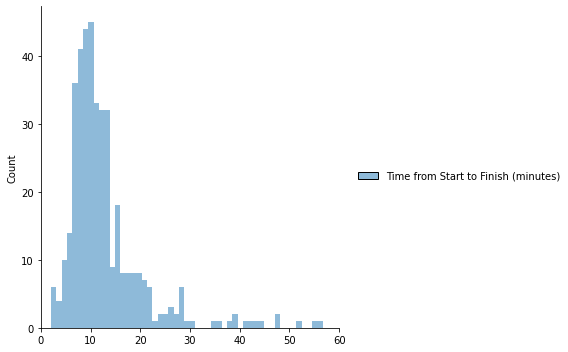

In [66]:
# Plot a histogram of user response times (~10m average)
responses_only_duration = responses_df_2021['Time from Start to Finish (seconds)']
responses_only_duration = pd.DataFrame(pd.to_numeric(responses_only_duration, errors='coerce')/60)
responses_only_duration.columns = ['Time from Start to Finish (minutes)']
sns.displot(responses_only_duration,bins=15000).set(xlim=(0, 60))
median = round(responses_df_2021['Time from Start to Finish (seconds)'].median()/60,0)
print('The median response time was approximately',median,'minutes.')
filtered_responses_df_2021 = pd.DataFrame(pd.to_numeric(responses_df_2021['Time from Start to Finish (seconds)'], errors='coerce'))
filtered_responses_df_2021 = filtered_responses_df_2021[filtered_responses_df_2021['Time from Start to Finish (seconds)'] > 299]  
print('The total number of respondents that took more than 5 minutes was',filtered_responses_df_2021.shape[0])

**Future directions to consider:**
* Divide the population into interesting subgroups and identify interesting insights.

 * Do students have different preferences as compared to professionals?
 * Do GCP customers have different preferences as compared to AWS customers?
 * Which cloud computing platforms have seen the most growth in recent years?
 * Do salaries scale according to experience levels?  What traits might predict having a very high salary?

 

**Credits / Attribution:**

* This notebooks uses the [2021 Kaggle DS & ML Survey dataset](https://www.kaggle.com/c/kaggle-survey-2021).  Specifically, [pandas](https://pandas.pydata.org/pandas-docs/stable/) is used to  manipulate the data and [plotly](https://plotly.com/python/) is used to visualize the data.
* The idea to organize the value_counts() into dictionaries came from [a notebook that was authored by @sonmou](https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science) using the [2019 Kaggle DS & ML challenge dataset](https://www.kaggle.com/c/kaggle-survey-2019).  I liked this approach because the dictionaries themselves are useful artifacts that can be reused by other competitors and also they can be used to provide a quick way to review all of the different answer choices for each individual question.  You can find these dictionaries in code cell number four if you want to paste them into your own notebook.   
* This notebook (and every other public notebook on Kaggle) was released under an [Apache 2.0 license](https://www.apache.org/licenses/LICENSE-2.0). 

In [67]:
!mkdir /kaggle/working/docker/
!pip freeze > '/kaggle/working/docker/requirements.txt'
print('This notebook makes use of \nthe following Python libraries:\n')
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
import plotly_express as px
print('plotly express:',px.__version__)
survey_df_2021.to_csv('2021_kaggle_ds_and_ml_survey_data_scientists_in_usa_responses_only.csv',index=False)

This notebook makes use of 
the following Python libraries:

numpy: 1.19.5
pandas: 1.3.2
seaborn: 0.11.2
plotly express: 0.4.1
